Customer Churn Analysis

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

Prediction:

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#import all libaries
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv"



In [2]:
#stroing into csv file
df = pd.read_csv(url)
df.to_csv("Customer_Churn_Analysis.csv",sep='\t')

In [3]:
#create dataframe
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

Here customerID,  Partner,tenure,MonthlyCharges,TotalCharges are the columns which has categorical ordinal data type.

And PhoneService, MultipleLines, InternetService,OnlineSecurity,OnlineBackup,DeviceProtection, TechSupport,StreamingTV,StreamingMovies, Contract, PaperlessBilling, PaymentMethod,SeniorCitizen, gender, Dependents are the columns which has categorical nominal data type
       
Our Target column is Churn which has categorical nominal data type.Hence our problem is the Classification problem.       
      

In [5]:
df.columns #checking column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


EDA:

In [7]:
df.isnull().sum() #checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.apply(lambda x: len(x.unique())) # getting unique values of all the columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df['Churn'] = df['Churn'].replace(('Yes','No'),(0,1))

#change column values to 0 and 1

In [10]:
round(df['SeniorCitizen'].value_counts(normalize=True)*100,2)

0    83.79
1    16.21
Name: SeniorCitizen, dtype: float64

No of senior citizens is very low and 16% only in overall

In [11]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

there are 0 tenure present in the column so the total charges could be then equal to one time charges

In [12]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
5831.2      1
1654.6      1
712.25      1
864.55      1
3023.65     1
Name: TotalCharges, Length: 6531, dtype: int64

there are none values present in totalcharges 

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'yes', 0: 'no'}).astype('category')

convert seniorcitizen values to 0 and 1

In [14]:
df['tenuremonth'] = (df['tenure'] * df['MonthlyCharges']).astype(float)

it is the total amount paid in overall tenure

In [15]:
# 6 features, convert 'no internet service' to 'no'
no_int_service_vars = ['OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection','TechSupport', 
                       'StreamingTV', 'StreamingMovies']
for var in no_int_service_vars:
    df[var] = df[var].map({'No internet service': 'No',
                           'Yes': 'Yes',
                           'No': 'No'}).astype('category')
for var in no_int_service_vars:
    print(df[var].value_counts())

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


replace no internet service value to no in the columns

In [16]:
view=df[df['Churn']==1]
view.loc[:,['customerID','gender','tenure','Contract','PaymentMethod','TotalCharges']]

,customerID,gender,tenure,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,1,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,34,One year,Mailed check,1889.5
3,7795-CFOCW,Male,45,One year,Bank transfer (automatic),1840.75
6,1452-KIOVK,Male,22,Month-to-month,Credit card (automatic),1949.4
7,6713-OKOMC,Female,10,Month-to-month,Mailed check,301.9
...,...,...,...,...,...,...
7037,2569-WGERO,Female,72,Two year,Bank transfer (automatic),1419.4
7038,6840-RESVB,Male,24,One year,Mailed check,1990.5
7039,2234-XADUH,Female,72,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,11,Month-to-month,Electronic check,346.45


displays churn customer details

In [17]:
first_view=df[df['tenure']==0]
first_view.loc[:,['customerID','gender','tenure','MonthlyCharges','TotalCharges']]

,customerID,gender,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,Female,0,52.55,
753,3115-CZMZD,Male,0,20.25,
936,5709-LVOEQ,Female,0,80.85,
1082,4367-NUYAO,Male,0,25.75,
1340,1371-DWPAZ,Female,0,56.05,
3331,7644-OMVMY,Male,0,19.85,
3826,3213-VVOLG,Male,0,25.35,
4380,2520-SGTTA,Female,0,20.00,
5218,2923-ARZLG,Male,0,19.70,
6670,4075-WKNIU,Female,0,73.35,


displays details of tenure month '0'

In [18]:
#Convert TotalCharges Column to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [19]:
# fill missing values by the monthly charges where the tenure is 0, we suppose that the monthly charge is the total amount of charges.
df['TotalCharges'].fillna(df[df['tenure']==0]['MonthlyCharges'], inplace=True)

In [20]:
#visualize
view1=df[df['tenure']==0]
view1.loc[:,['customerID','gender','tenure','MonthlyCharges','TotalCharges']]

,customerID,gender,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,Female,0,52.55,52.55
753,3115-CZMZD,Male,0,20.25,20.25
936,5709-LVOEQ,Female,0,80.85,80.85
1082,4367-NUYAO,Male,0,25.75,25.75
1340,1371-DWPAZ,Female,0,56.05,56.05
3331,7644-OMVMY,Male,0,19.85,19.85
3826,3213-VVOLG,Male,0,25.35,25.35
4380,2520-SGTTA,Female,0,20.00,20.00
5218,2923-ARZLG,Male,0,19.70,19.70
6670,4075-WKNIU,Female,0,73.35,73.35


In [21]:
monthly_income  = df['MonthlyCharges'].sum()
churn_customer_amount = df.groupby(by=['Churn']).MonthlyCharges.sum().to_frame()
churn_customer_amount["%"] = 0
churn_customer_amount["%"]= churn_customer_amount["MonthlyCharges"].apply(lambda x: round(x/churn_customer_amount['MonthlyCharges'].sum(), 3))
churn_customer_amount.columns=['Total', '%']
print('The amount of MothlyChages : ',monthly_income)
display(churn_customer_amount)


The amount of MothlyChages :  456116.6


,Total,%
Churn,,
0,139130.85,0.305
1,316985.75,0.695


displays churn category wise monthlycharges and percentages

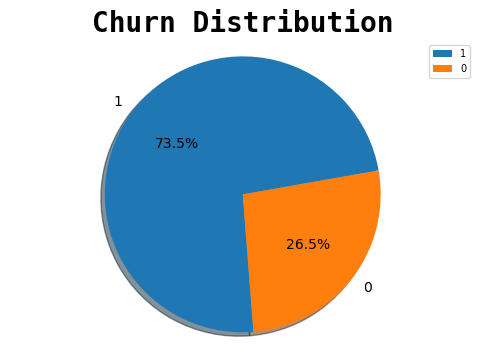

In [22]:
# Creating a pie chart 
ax = df['Churn'].value_counts()

plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.pie(ax.values, labels=ax.index, startangle=10, explode=(None), shadow=True, autopct='%1.1f%%')
plt.title('Churn Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

churn customer percentage is higher than not churn

In [23]:
#function to create pivote table 
def table(data,column,index,value,aggf):
    count = data[data[column]==1].pivot_table(index=index,columns=column,values=value, aggfunc=aggf)
    prct  = round(count/data[data[column]==1].shape[0],3)
    data  = pd.concat([count,prct],axis=1)
    data.columns = ['Total','%']
    return data 

In [24]:
table(data=df,column='Churn',index='gender',value='customerID', aggf='count')

,Total,%
gender,,
Female,2549,0.493
Male,2625,0.507


displays gender category wise total count values and percentages

In [25]:
table(data=df,column='Churn',index='SeniorCitizen',value='customerID', aggf='count')

,Total,%
SeniorCitizen,,
no,4508,0.871
yes,666,0.129


displays SeniorCitizen category wise total count values and percentages

In [26]:
table(data=df,column='Churn',index='Partner',value='customerID', aggf='count')


,Total,%
Partner,,
No,2441,0.472
Yes,2733,0.528


displays Partner category wise total count values and percentages

In [27]:
table(data=df,column='Churn',index='Dependents',value='customerID', aggf='count')

,Total,%
Dependents,,
No,3390,0.655
Yes,1784,0.345


displays Dependents category wise total count values and percentages

In [28]:
table(data=df,column='Churn',index='PhoneService',value='customerID', aggf='count')

,Total,%
PhoneService,,
No,512,0.099
Yes,4662,0.901


displays PhoneService category wise total count values and percentages

DISPLAYS FEATURE WISE TOTAL COUNT OF CHURN AND PERCENTAGE VALUES

In [29]:
table(data=df,column='Churn',index='MultipleLines',value='customerID', aggf='count')

,Total,%
MultipleLines,,
No,2541,0.491
No phone service,512,0.099
Yes,2121,0.410


In [30]:
table(data=df,column='Churn',index='OnlineSecurity',value='customerID', aggf='count')

,Total,%
OnlineSecurity,,
No,3450,0.667
Yes,1724,0.333


In [31]:
table(data=df,column='Churn',index='OnlineBackup',value='customerID', aggf='count')

,Total,%
OnlineBackup,,
No,3268,0.632
Yes,1906,0.368


In [32]:
table(data=df,column='Churn',index='DeviceProtection',value='customerID', aggf='count')

,Total,%
DeviceProtection,,
No,3297,0.637
Yes,1877,0.363


In [33]:
table(data=df,column='Churn',index='TechSupport',value='customerID', aggf='count')

,Total,%
TechSupport,,
No,3440,0.665
Yes,1734,0.335


In [34]:
table(data=df,column='Churn',index='StreamingTV',value='customerID', aggf='count')

,Total,%
StreamingTV,,
No,3281,0.634
Yes,1893,0.366


In [35]:
table(data=df,column='Churn',index='StreamingMovies',value='customerID', aggf='count')

,Total,%
StreamingMovies,,
No,3260,0.63
Yes,1914,0.37


In [36]:
table(data=df,column='Churn',index='PaperlessBilling',value='customerID', aggf='count')

,Total,%
PaperlessBilling,,
No,2403,0.464
Yes,2771,0.536


In [37]:
table(data=df,column='Churn',index='PaymentMethod',value='customerID', aggf='count')

,Total,%
PaymentMethod,,
Bank transfer (automatic),1286,0.249
Credit card (automatic),1290,0.249
Electronic check,1294,0.250
Mailed check,1304,0.252


In [38]:
table(data=df,column='Churn',index='Contract',value='customerID', aggf='count')

,Total,%
Contract,,
Month-to-month,2220,0.429
One year,1307,0.253
Two year,1647,0.318


In [39]:
df.corr()['Churn'].sort_values(ascending = False)#Get Correlation of "Churn"

Churn             1.000000
tenure            0.352229
tenuremonth       0.198514
TotalCharges      0.198347
MonthlyCharges   -0.193356
Name: Churn, dtype: float64

Displays correlation of churn column with other numeric column.Here tenure feature has the high correlation with churn

In [40]:
df['Churn'] = df['Churn'].replace((0,1),('Yes','No'))#replace churn values to 0 and 1

In [41]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_phoneservice=df[df['Churn']=='Yes'].pivot_table(index='MultipleLines',columns='Churn', values='customerID', aggfunc='count')
churn_phoneservice["%"] = churn_phoneservice["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_phoneservice

Churn,Yes,%
MultipleLines,,
No,849,0.454254
No phone service,170,0.090958
Yes,850,0.454789


shows whether multiplelines of  churn customer's counts and percentages

In [42]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_demographic=df[df['Churn']=='Yes'].pivot_table(columns='Churn',index= 'SeniorCitizen', values='customerID', aggfunc='count')
churn_demographic["%"] = churn_demographic["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_demographic

Churn,Yes,%
SeniorCitizen,,
no,1393,0.745318
yes,476,0.254682


shows whether SeniorCitizen of churn customer's counts and percentages values

In [43]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_internetservices=df[df['Churn']=='Yes'].pivot_table(index=['InternetService','OnlineSecurity','OnlineBackup'],columns='Churn', values='customerID', aggfunc='count')
churn_internetservices["%"] = churn_internetservices["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_internetservices


Churn                                        Yes         %
InternetService OnlineSecurity OnlineBackup               
DSL             No             No            274  0.146602
                               Yes            73  0.039058
                Yes            No             69  0.036918
                               Yes            43  0.023007
Fiber optic     No             No            783  0.418941
                               Yes           331  0.177100
                Yes            No            107  0.057250
                               Yes            76  0.040663
No              No             No            113  0.060460
                               Yes             0  0.000000
                Yes            No              0  0.000000
                               Yes             0  0.000000

shows whether InternetService of churn customer's counts and percentages values

In [44]:
churn_inter_deviceprotec=df[df['Churn']=='Yes'].pivot_table(index=['TechSupport','DeviceProtection'],columns='Churn', values='customerID', aggfunc='count')
churn_inter_deviceprotec["%"] = churn_inter_deviceprotec["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_inter_deviceprotec

Churn                          Yes         %
TechSupport DeviceProtection                
No          No                1161  0.621188
            Yes                398  0.212948
Yes         No                 163  0.087212
            Yes                147  0.078652

shows whether TechSupport of churn customer's counts and percentages values

In [45]:
churn_streaming=df[df['Churn']=='Yes'].pivot_table(index=['StreamingTV','StreamingMovies'],columns='Churn', values='customerID', aggfunc='count')
churn_streaming["%"] = churn_streaming["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_streaming

Churn                        Yes         %
StreamingTV StreamingMovies               
No          No               808  0.432317
            Yes              247  0.132156
Yes         No               243  0.130016
            Yes              571  0.305511

shows whether StreamingTV of churn customer's counts and percentages values

In [46]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_billinginfo = df[df['Churn']=='Yes'].pivot_table(columns='Churn',index='PaperlessBilling', values='customerID', aggfunc='count')
churn_billinginfo["%"] = churn_billinginfo["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_billinginfo

Churn,Yes,%
PaperlessBilling,,
No,469,0.250936
Yes,1400,0.749064


shows whether PaperlessBilling of churn customer's counts and percentages values

In [47]:
churn_customer_totamount = df.groupby(by=['Churn']).TotalCharges.sum().to_frame()
churn_customer_totamount

,TotalCharges
Churn,
No,13193697.4
Yes,2862926.9


displays churn category wise customer details of totalcharges

In [48]:
churn_customer_amount = df.groupby(by=['Churn']).MonthlyCharges.sum().to_frame()
churn_customer_amount

,MonthlyCharges
Churn,
No,316985.75
Yes,139130.85


displays churn category wise customer details of MonthlyCharges

In [49]:
df[["gender", "Churn"]].groupby(by="Churn").count()

,gender
Churn,
No,5174
Yes,1869


displays churn category wise customer's gender details of count values

In [50]:
# Examine the distribution of TotalCharges
df.TotalCharges.describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

(array([2720., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

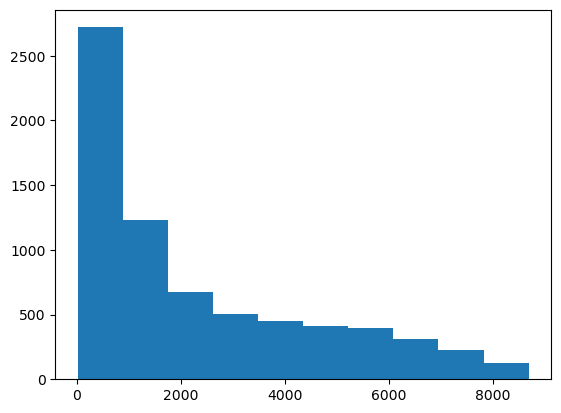

In [51]:
# Examine the distribution of TotalCharges
plt.hist(data = df, x = 'TotalCharges')

I found that around 20% of the data are extremely high, so I decided to divide them to see each distribution of data.

In [52]:
#find the 80th percentile of the data in total charges
df.TotalCharges.quantile(0.8)

4471.440000000001

In [53]:
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
TotalCharges_under80 = df.query('TotalCharges<=2827.59')
TotalCharges_above80 = df.query('TotalCharges>2827.59')
TotalCharges_under80.TotalCharges.describe()

count    4741.000000
mean      888.238294
std       773.809212
min        18.800000
25%       198.250000
50%       684.050000
75%      1414.800000
max      2823.000000
Name: TotalCharges, dtype: float64

In [54]:
#show the distribution of its TotalCharges above 80th percentile
TotalCharges_above80.TotalCharges.describe()

count    2302.000000
mean     5145.736990
std      1511.316386
min      2830.450000
25%      3858.900000
50%      4966.550000
75%      6302.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [55]:
#show the distribution of its tenure under 80th percentile
TotalCharges_under80.tenure.describe()

count    4741.000000
mean       20.211348
std        19.218125
min         0.000000
25%         4.000000
50%        14.000000
75%        30.000000
max        72.000000
Name: tenure, dtype: float64

In [56]:
#show the distribution of its tenure above 80th percentile
TotalCharges_above80.tenure.describe()

count    2302.000000
mean       57.414422
std        12.370365
min        27.000000
25%        48.000000
50%        60.000000
75%        69.000000
max        72.000000
Name: tenure, dtype: float64

In [57]:
# Extract those who are paying the service
paying_df = df.query('Churn=="No"')

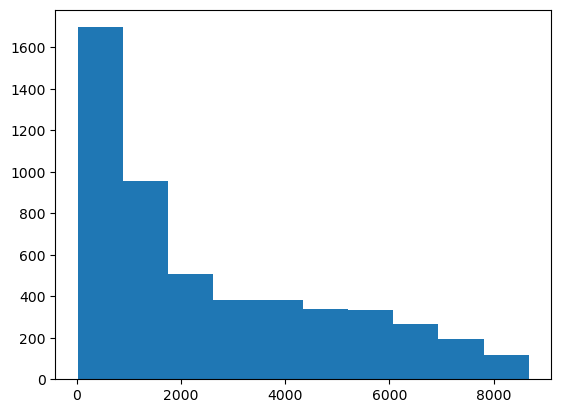

In [58]:
# Visualize
plt.hist(data = paying_df, x = 'TotalCharges');

Note: In order to equally invesetigate data, I decided to divide the data into 80/20% as last two questions

In [59]:
#find the 80th percentile of the data in total charges
paying_df.TotalCharges.quantile(0.8)

4890.900000000001

In [60]:
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
paying_TotalCharges_under80 = paying_df.query('TotalCharges<=4890')
paying_TotalCharges_above80 = paying_df.query('TotalCharges>4890')
paying_TotalCharges_under80.TotalCharges.mean(),paying_TotalCharges_above80.TotalCharges.mean()

(1588.4743233446102, 6390.531515444026)

In [61]:
paying_TotalCharges_under80.tenure.mean(),paying_TotalCharges_above80.tenure.mean()

(30.619139681005315, 65.33301158301158)

VISUALIZATION

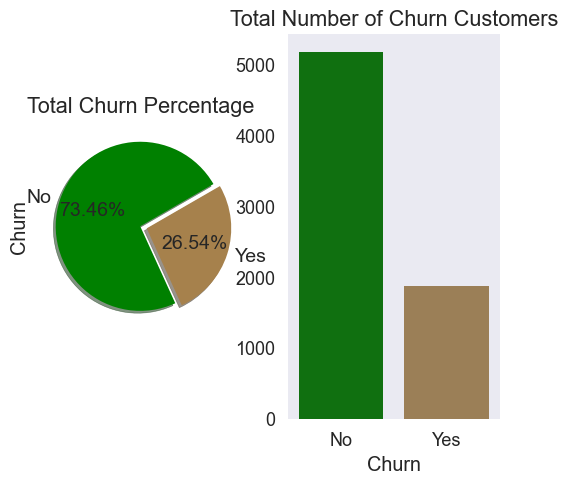

In [62]:
plt.style.use(['seaborn-dark','seaborn-talk'])
fig, ax = plt.subplots(1,2,figsize=(6,5))
df['Churn'].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30, colors=["#008000", "#a6814c"])
ax[0].set_title('Total Churn Percentage')

sns.countplot('Churn', data=df, ax=ax[1], palette=["#008000", "#a6814c"])
ax[1].set_title('Total Number of Churn Customers')
ax[1].set_ylabel(' ')

plt.show()

This shows this is imbalanced dataset.churn customer is higher in count than not churn customer

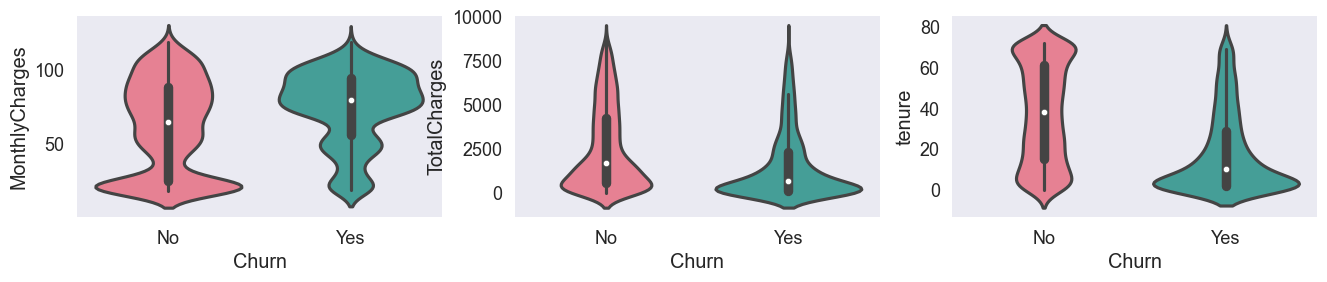

In [67]:
plt.figure(figsize=(16, 12))

for e, column in enumerate(['MonthlyCharges','TotalCharges','tenure']):
    plt.subplot(4, 3, e + 1)
    sns.violinplot( data=df, x='Churn', y=column, palette="husl")

displays median values for charges customer pays and  their tenure details

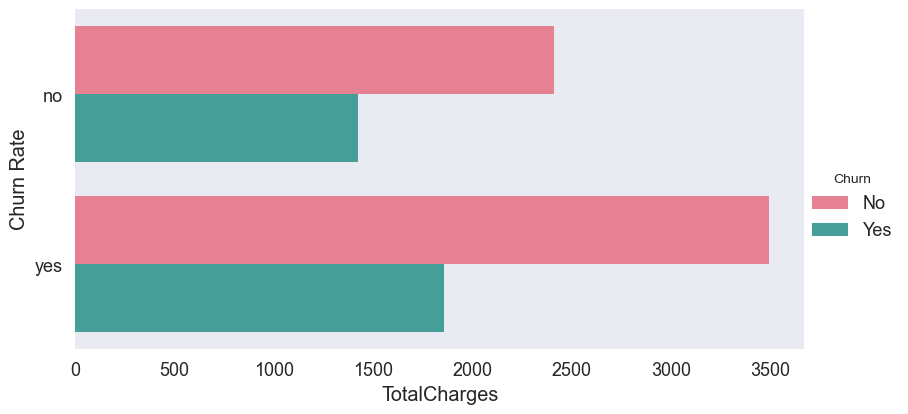

In [68]:
g = sns.factorplot( x="TotalCharges", y="SeniorCitizen", hue='Churn', data=df, size=4, aspect=2, kind="bar", palette="husl", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()

churn customer pays higher than not churn

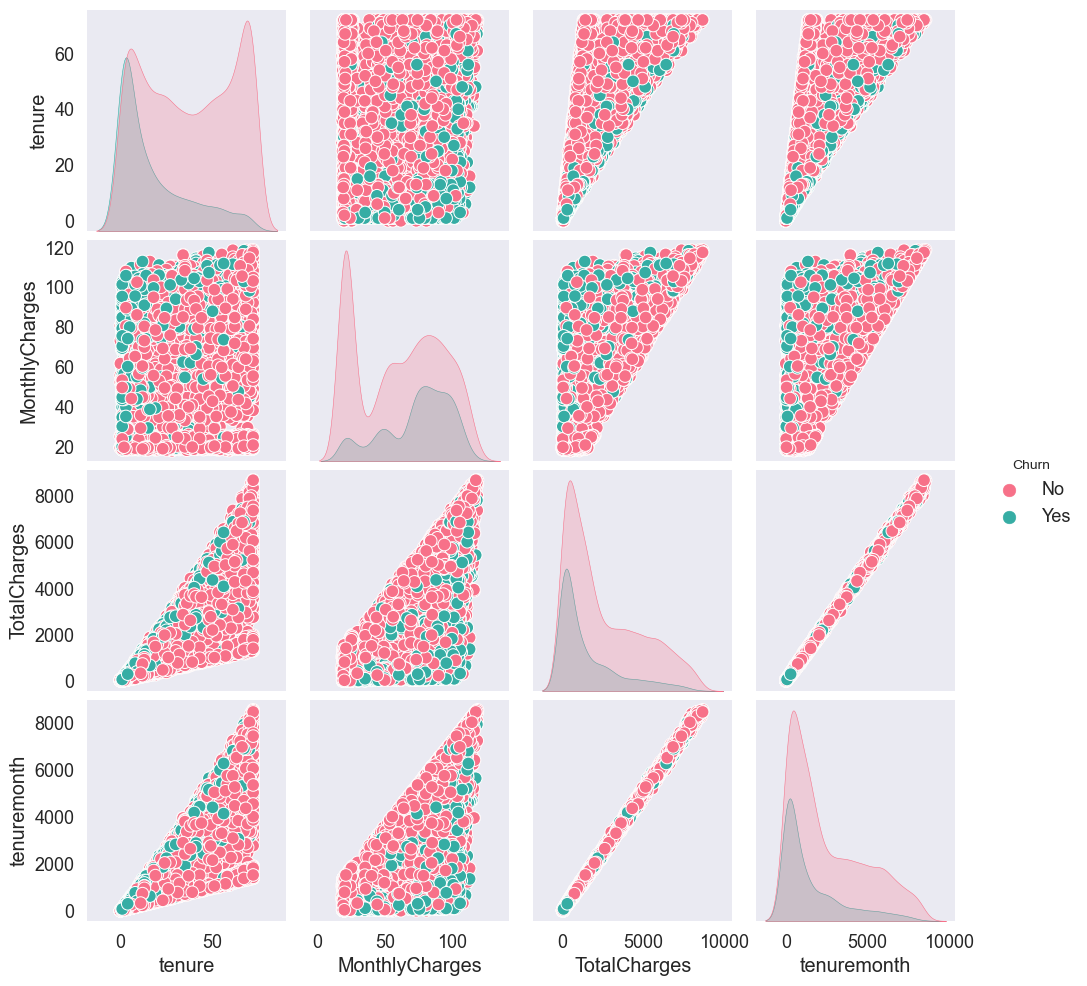

In [69]:
sns.pairplot(df, hue="Churn", palette='husl')
sns.despine()

if monthly charge increases total charges increases and if tenure increases total charges also increases

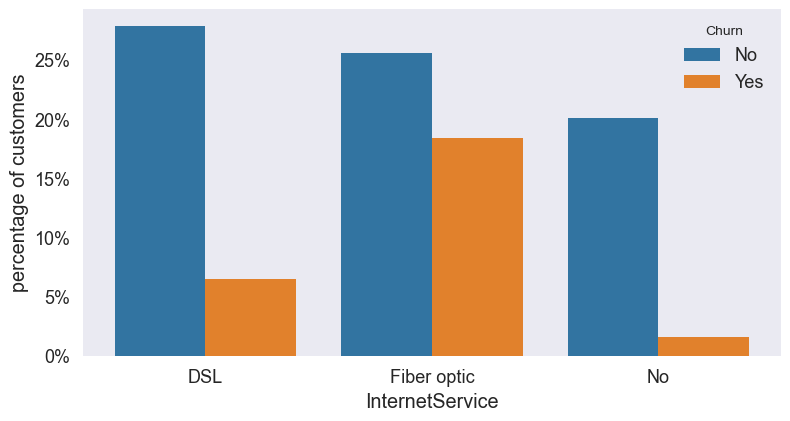

In [76]:
def barplot_percentages(f, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(f)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=f, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=f, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

plt.figure(figsize=(9, 4.5))
barplot_percentages('InternetService')

not churn customers uses DSL service most

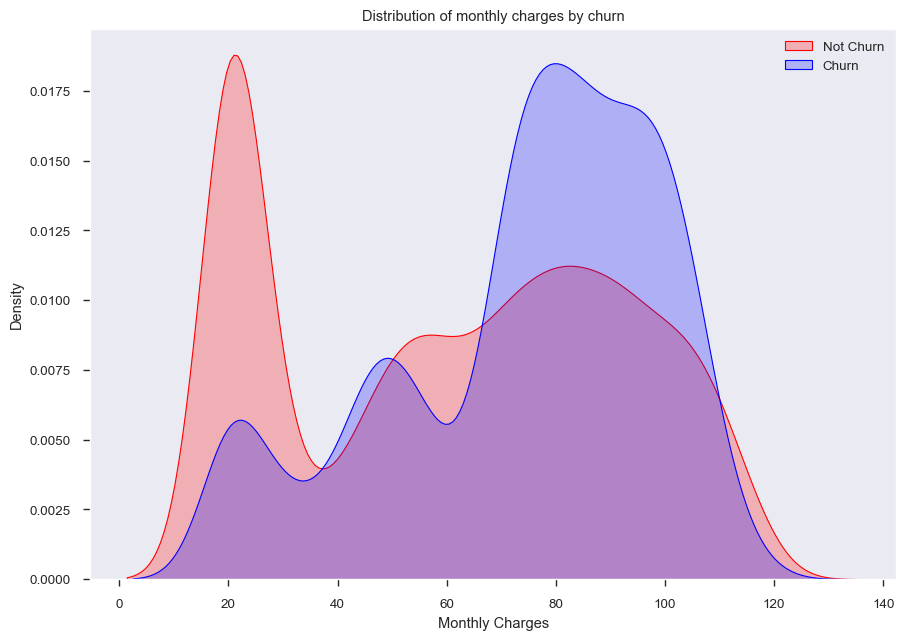

In [79]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

churn customer paying higher charges than not churn

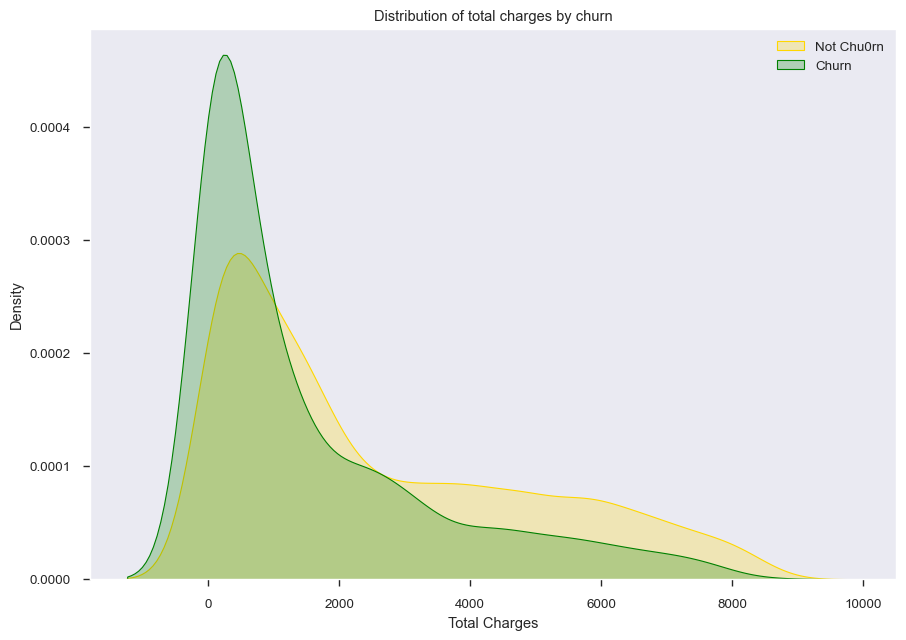

In [80]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

churn customer paying higher total charges than not churn

In [260]:
import plotly.express as px

In [261]:
def display_bars_splitted(a,b="Churn"):
    df_g = df.groupby([a, b]).size().reset_index()
    df_g['percentage'] = df.groupby([a, b]).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
    df_g.columns = [a, b, 'Counts', 'Percentage']

    fig = px.bar(df_g, x=a, y=['Counts'], color=b, title = a, text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
    fig.show()

In [264]:
display_bars_splitted("gender")
display_bars_splitted("Partner")
display_bars_splitted("Dependents")
display_bars_splitted("MultipleLines")
display_bars_splitted("InternetService")
display_bars_splitted("OnlineSecurity")
display_bars_splitted("OnlineBackup")
display_bars_splitted("DeviceProtection")
display_bars_splitted("TechSupport")
display_bars_splitted("StreamingTV")
display_bars_splitted("Contract")
display_bars_splitted("PaperlessBilling")
display_bars_splitted("PaymentMethod")


the above graphs shows churn customer is only in higher ratio than not churn customer in all categories of features

In [110]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')

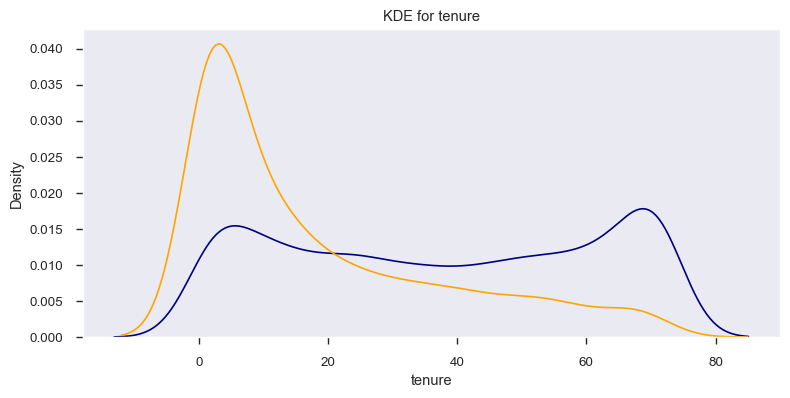

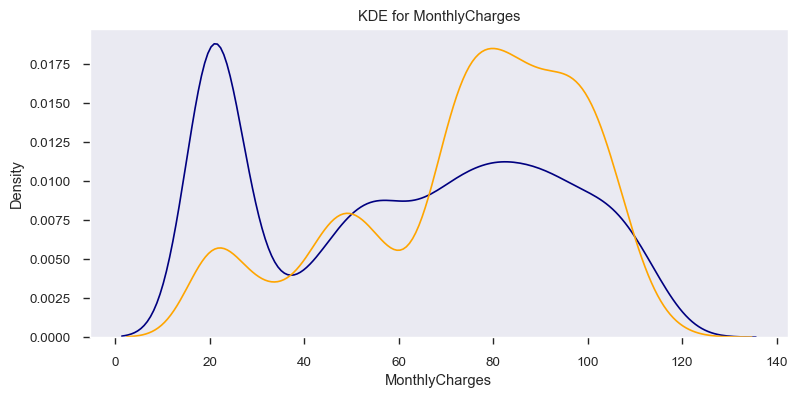

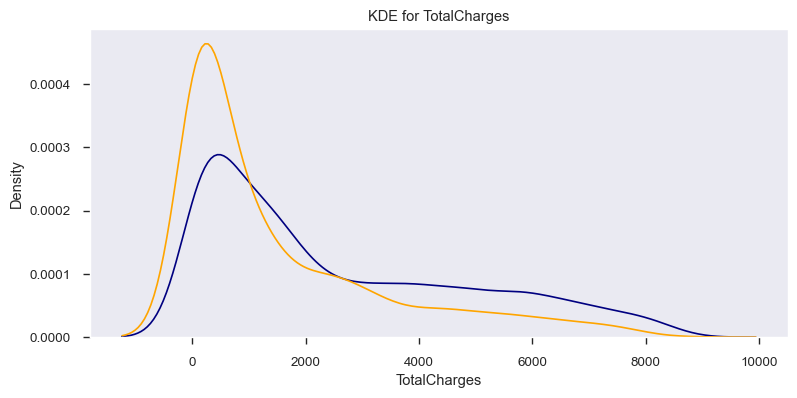

In [111]:
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

this graph shows churn customer pays higher charges in longer tenure than not churn customers

In [113]:
df_num1=df[["tenure", "MonthlyCharges", "TotalCharges"]]

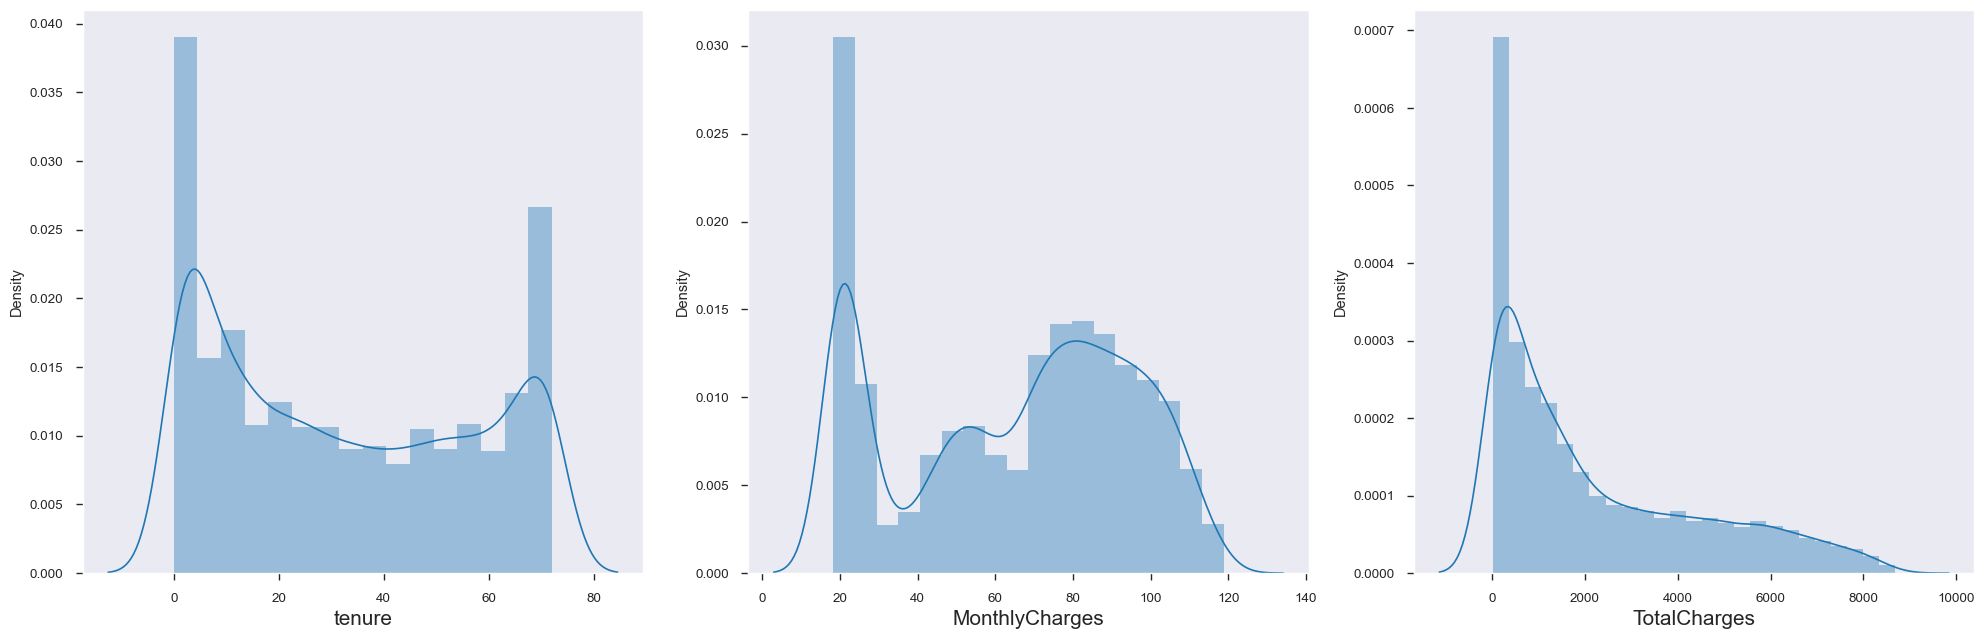

In [114]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df_num1:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

in above,totalcharges has more skewness 

DATA PRE-PROCESSING And FEATURE ENGINEERING

In [116]:
df['Churn'] = df['Churn'].replace(('Yes','No'),(0,1))

In [117]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenuremonth,MonthlyCharges.binned
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,29.85,"(0, 55]"
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,1,1936.30,"(55, 90]"
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,107.70,"(0, 55]"
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1,1903.50,"(0, 55]"
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,141.40,"(55, 90]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,1,2035.20,"(55, 90]"
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,1,7430.40,"(90, 120]"
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,1,325.60,"(0, 55]"
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,0,297.60,"(55, 90]"


In [118]:
df=df.drop(['tenuremonth','MonthlyCharges.binned'],axis=1)

drop columns becoz it created only for analysis purpose

In [121]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,1
1,3962,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,1
2,2564,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,0
3,5535,1,0,0,0,45,0,1,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,1,...,1,1,1,1,1,1,3,84.80,1990.50,1
7039,1525,0,0,1,1,72,1,2,1,0,...,1,0,1,1,1,1,1,103.20,7362.90,1
7040,3367,0,0,1,1,11,0,1,0,1,...,0,0,0,0,0,1,2,29.60,346.45,1
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int32  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [124]:
#find correlation co.efficient of all variables in table
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.015412,...,-0.003765,0.003848,-0.004493,-0.012632,0.015028,-0.001945,0.011604,-0.003916,0.000365,0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.017021,...,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.000087,0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.038653,...,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.102997,-0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.143106,...,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.317532,0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.080972,...,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.062124,0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.327203,...,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.826164,0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.092893,...,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.113203,-0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.131128,...,0.231661,0.134768,0.274823,0.279727,0.110842,0.165146,-0.176793,0.433576,0.452593,-0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.393013,...,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.175771,0.047291
OnlineSecurity,0.015412,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.131128,-0.393013,1.000000,...,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.411679,0.171226


there is multicollinearity exists between streaming and streaming movies

<AxesSubplot:>

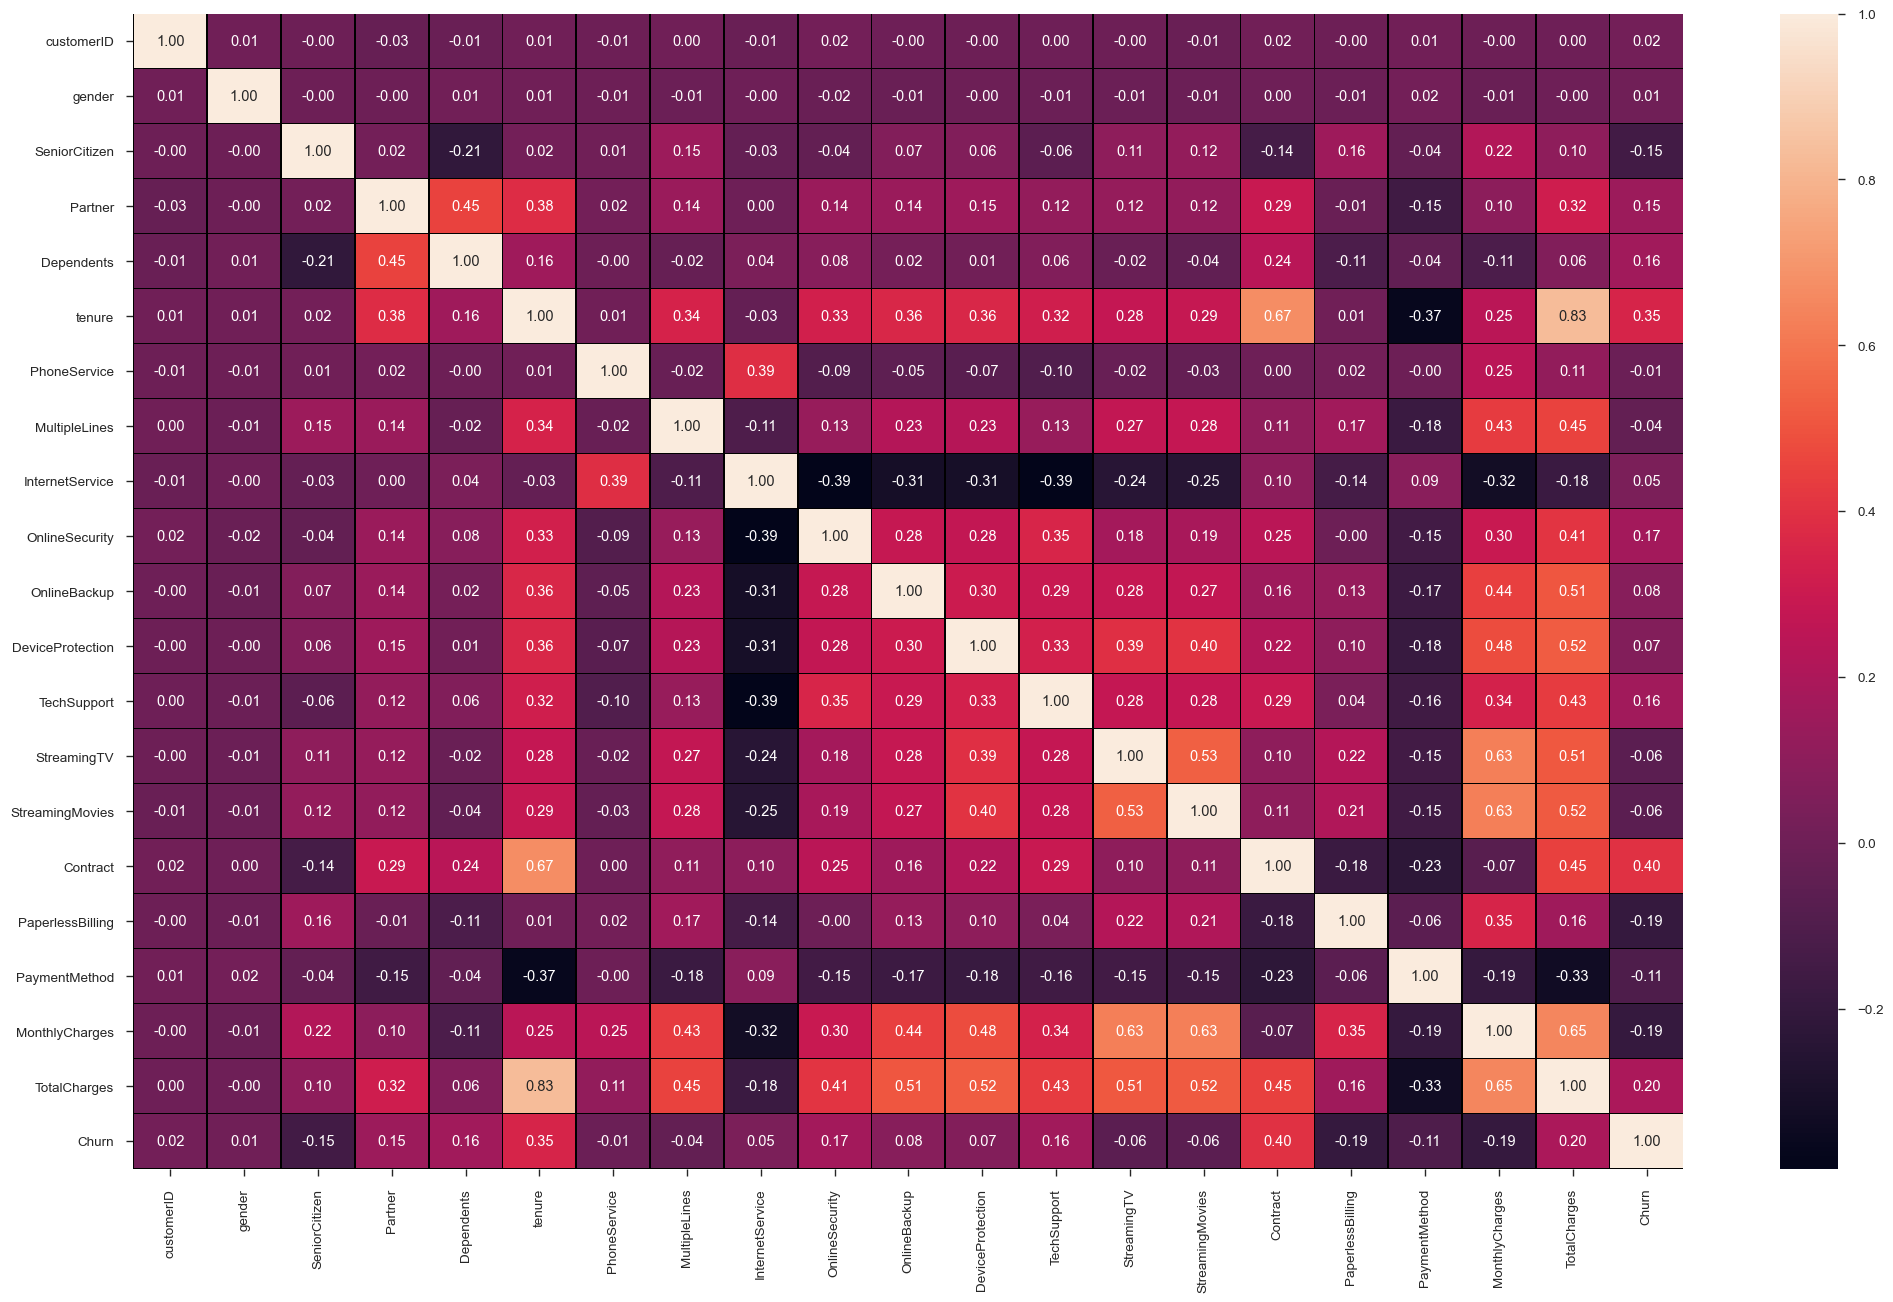

In [125]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

contract is the most positively correlated with target.tenure and total chrages also has most correlation with target.there is no zero correlation here with target.Paperbilling,monthly charges are the most negatively correlated with the target column.senior citizen also has some negative correlation with the target column churn.

In [126]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.286668,...,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,2279.798992,0.734630
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.452237,...,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,2266.730170,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,1.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000



there is so much of gap between the 75% and the max.there are outliers and skewness.
the mean and std dev is not also much close to 0

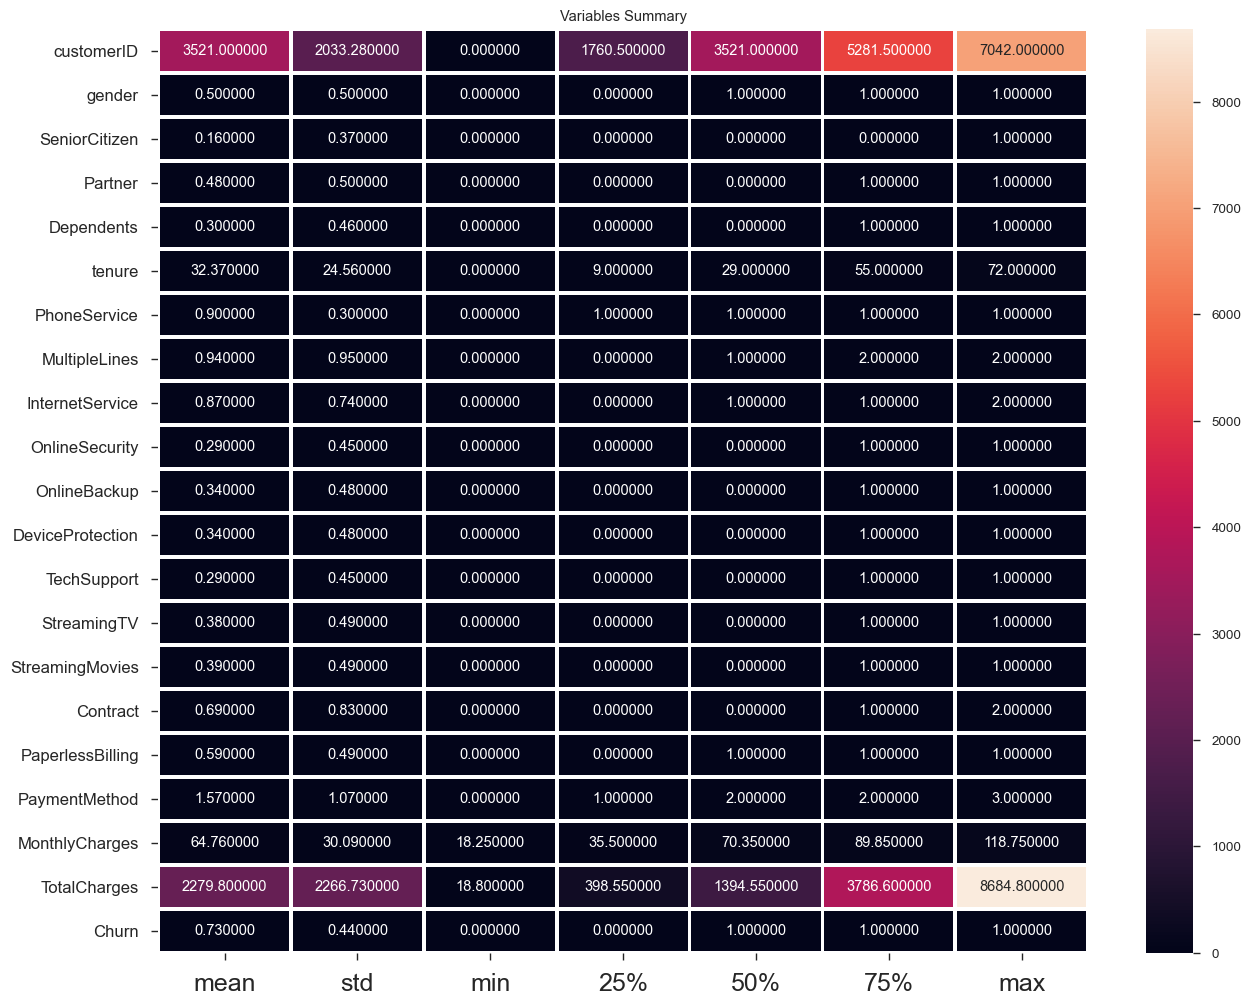

In [127]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [128]:
#VIF calculation
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
df.shape

(7043, 21)

In [130]:
df.shape[1]

21

In [132]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

,Variables,VIF FACTOR
0,customerID,3.735441
1,gender,1.967843
2,SeniorCitizen,1.372378
3,Partner,2.822419
4,Dependents,1.967231
5,tenure,16.202804
6,PhoneService,17.440002
7,MultipleLines,2.814448
8,InternetService,4.462459
9,OnlineSecurity,2.092273


In [136]:
df=df.drop(['StreamingMovies'],axis=1)

drop becoz this has multicollinearity

In [137]:
calc_vif(df)

,Variables,VIF FACTOR
0,customerID,3.734631
1,gender,1.967750
2,SeniorCitizen,1.372049
3,Partner,2.822278
4,Dependents,1.967224
5,tenure,16.180279
6,PhoneService,16.446737
7,MultipleLines,2.796214
8,InternetService,4.462457
9,OnlineSecurity,2.068989


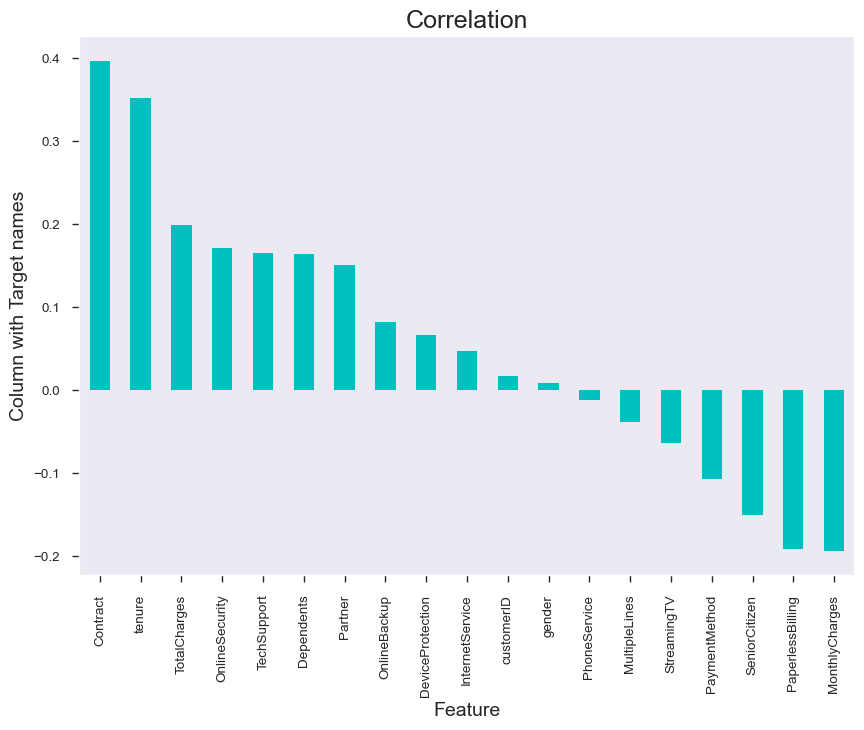

In [138]:
plt.figure(figsize=(10,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

this graph shows the positive and negative correlation of each variables with target column

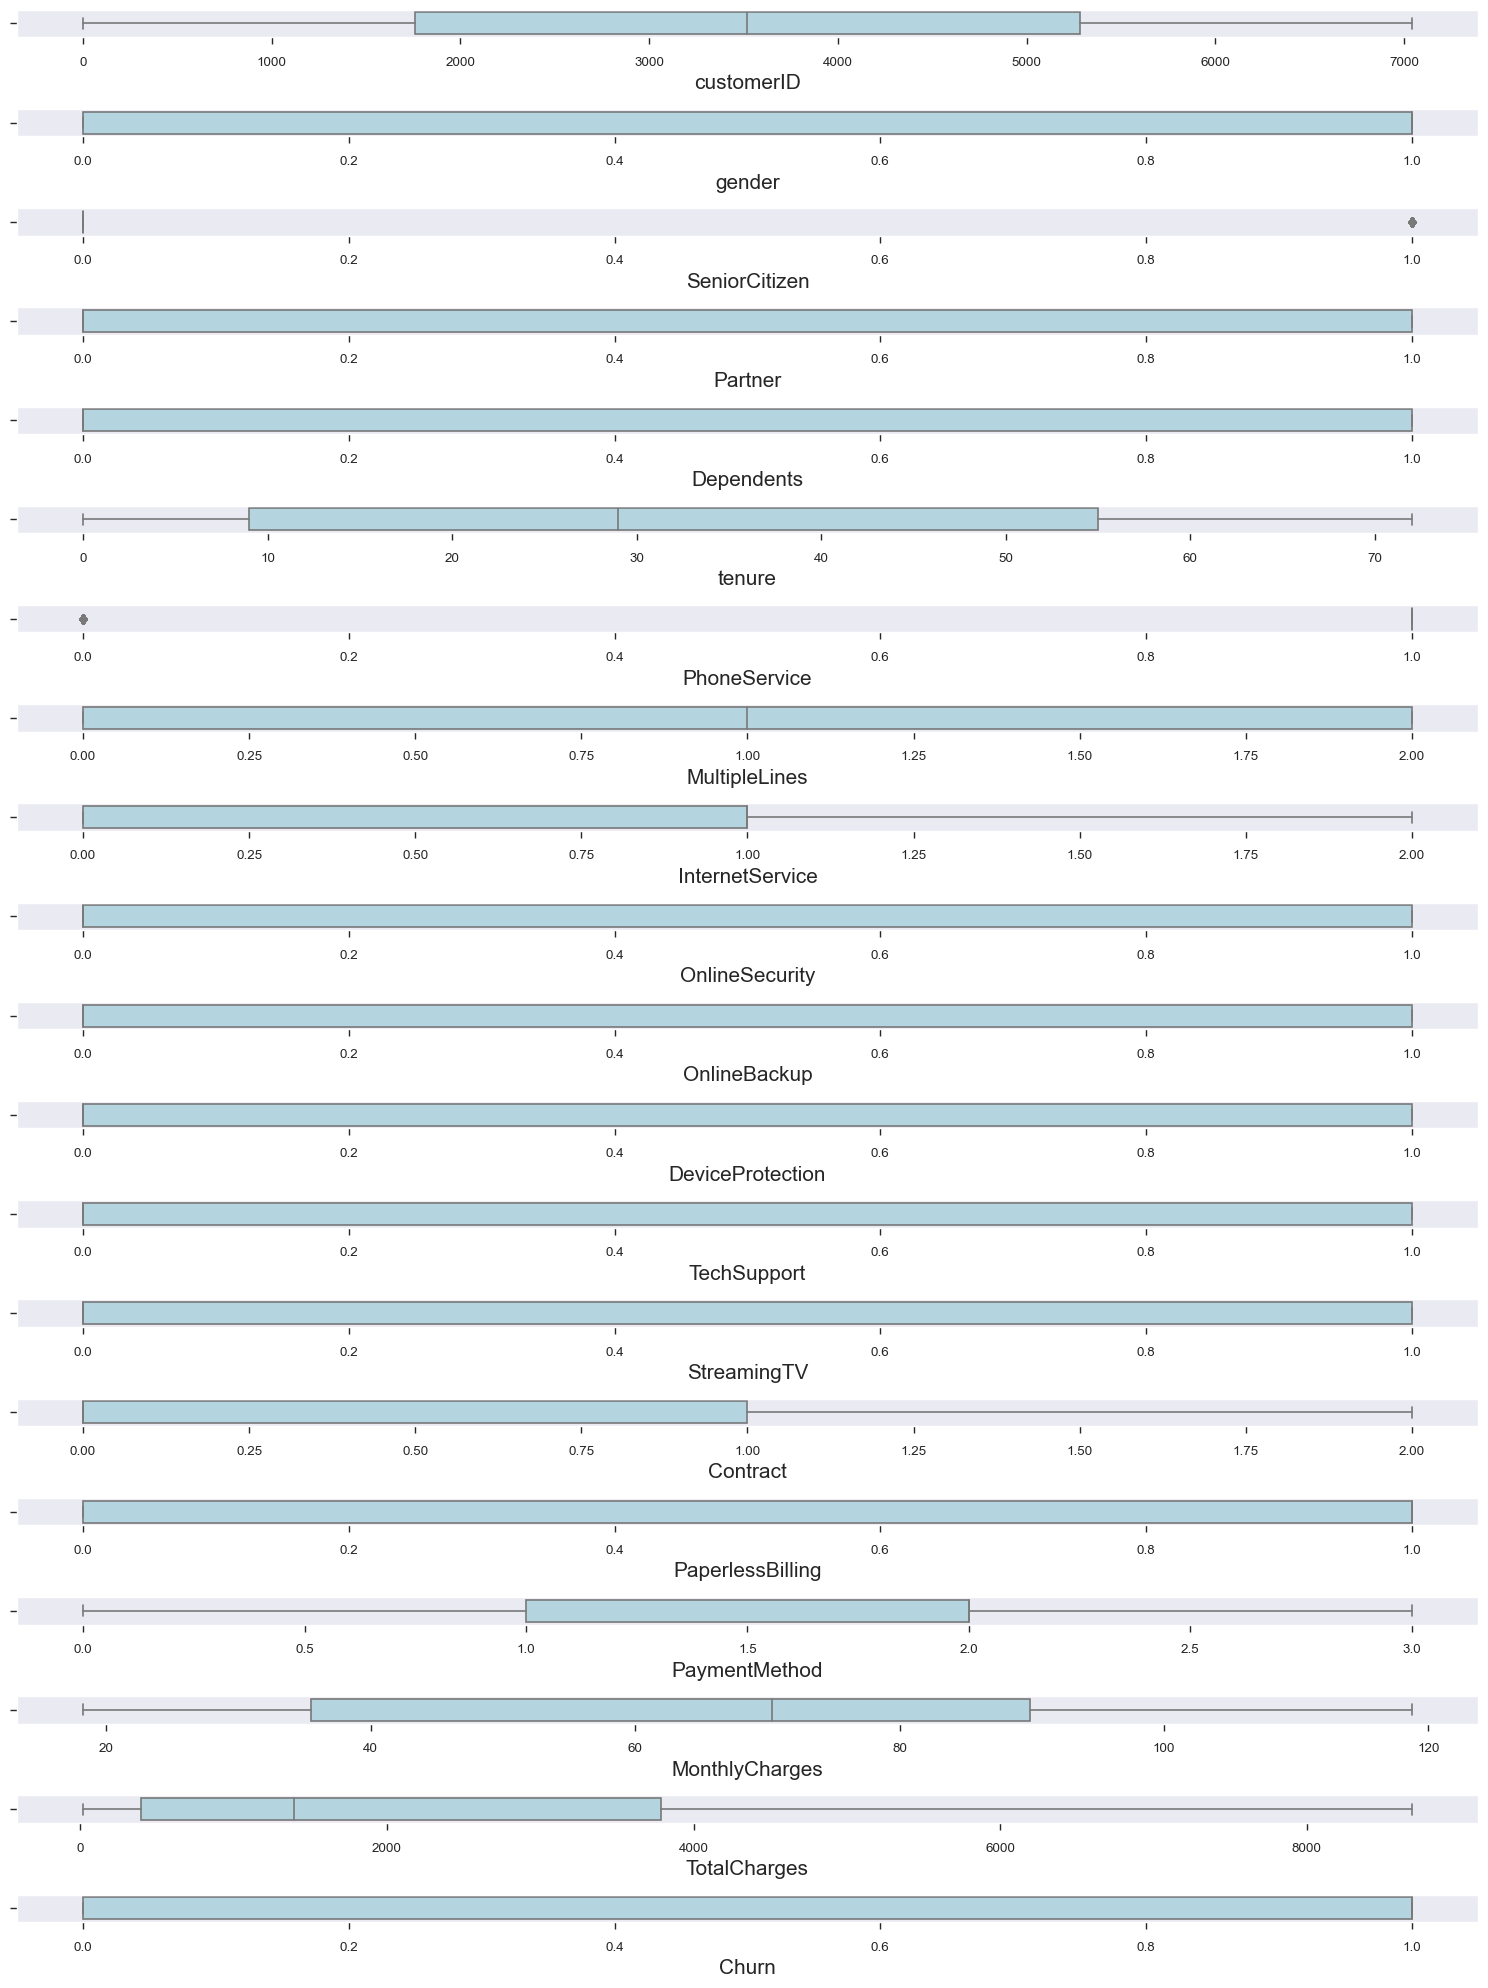

In [140]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in df:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

there are outliers present in columns

In [141]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.943722
OnlineBackup        0.652817
DeviceProtection    0.657450
TechSupport         0.924630
StreamingTV         0.475581
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963316
Churn              -1.063031
dtype: float64

In [142]:
df.shape

(7043, 20)

some skewness are present in the dataset

#checking Z-score to remove outliers

In [143]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(7043, 20)

In [144]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [145]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7043, 20)
(6361, 20)


some outliers got removed

In [146]:
#finds data loss
loss_percent=(7043-6361)/(7043*100)
print(loss_percent)

0.0009683373562402386


since data percentage loss is too low and its cleaned now

In [147]:
df_new


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,1,0,0,0,34,1,0,0,1,0,1,0,0,1,0,3,56.95,1889.50,1
2,2564,1,0,0,0,2,1,0,0,1,1,0,0,0,0,1,3,53.85,108.15,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,2,70.70,151.65,0
5,6551,0,0,0,0,8,1,2,1,0,0,1,0,1,0,1,2,99.65,820.50,0
6,1002,1,0,0,1,22,1,2,1,0,1,0,0,1,0,1,1,89.10,1949.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,0,72,1,0,2,0,0,0,0,0,2,1,0,21.15,1419.40,1
7038,4853,1,0,1,1,24,1,2,0,1,0,1,1,1,1,1,3,84.80,1990.50,1
7039,1525,0,0,1,1,72,1,2,1,0,1,1,0,1,1,1,1,103.20,7362.90,1
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,1,3,74.40,306.60,0


In [148]:
df_new.shape

(6361, 20)

In [149]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [151]:
print(f'Ratio of Churn:  {y.sum()/len(y)*100:.2f}%')

Ratio of Churn:  73.29%


SKEWNESS REMOVAL AND SCALING

In [152]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.30313384,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.373024  ,  0.22566284],
       [-0.35817008,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.47442923, -1.39531734],
       [ 1.35238168, -1.00741628, -0.44159123, ...,  0.41100623,
         0.08479714, -1.25996398],
       ...,
       [-0.92323829, -1.00741628, -0.44159123, ..., -0.52011602,
         1.20975572,  1.52585714],
       [ 1.12752839,  0.99263832,  2.26453771, ...,  1.31916733,
         0.21003559, -0.93696205],
       [-0.53290672,  0.99263832, -0.44159123, ..., -1.48777569,
         1.29661682,  1.44401815]])

In [153]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [154]:
#importing module-------scaling
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)
print(new_xtest)

[[0.85166919 1.         1.         ... 0.67645902 0.81079223 0.86535569]
 [0.87653925 1.         0.         ... 1.         0.05879113 0.46321686]
 [0.70556676 1.         0.         ... 1.         0.49148551 0.68994941]
 ...
 [0.75232672 0.         0.         ... 0.         0.62423192 0.60728063]
 [0.87590255 1.         0.         ... 1.         0.69840427 0.32254929]
 [0.90017345 0.         0.         ... 1.         0.2973848  0.24498025]]
[[0.31581207 1.         1.         ... 0.         0.63249193 0.85143483]
 [0.44011682 1.         0.         ... 1.         0.251644   0.06604862]
 [0.10840053 1.         0.         ... 0.         0.35741175 0.34507768]
 ...
 [0.43558078 1.         0.         ... 0.         0.05038396 0.50216296]
 [0.05183852 1.         0.         ... 0.         0.06145432 0.3930727 ]
 [0.33092538 0.         0.         ... 0.67645902 0.58308497 0.57361549]]


In [155]:
##The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)
###so we are balancing the classes with smote technique

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)
x_train_res, y_train_res = sm.fit_resample(new_xtrain, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3718
Before OverSampling, counts of label '0': 1370 

After OverSampling, the shape of train_X: (7436, 19)
After OverSampling, the shape of train_y: (7436,) 

After OverSampling, counts of label '1': 3718
After OverSampling, counts of label '0': 3718


MODEL PREDICTION

LOGSITIC REGRESSION

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [157]:
lr=LogisticRegression()




In [158]:
for i in range(0,100):
   
    lr.fit(x_train_res, y_train_res.ravel())
    pred_train=lr.predict(x_train_res)
    pred_test=lr.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        
        
        
   

#cv score

In [159]:
from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 76.04084838963078
accuracy score is: 76.04084838963078


At cv:- 3
cross validation score is: 76.04084838963078
accuracy score is: 76.04084838963078


At cv:- 4
cross validation score is: 76.04084838963078
accuracy score is: 76.04084838963078


At cv:- 5
cross validation score is: 76.04084838963078
accuracy score is: 76.04084838963078


At cv:- 6
cross validation score is: 76.04084838963078
accuracy score is: 76.04084838963078


At cv:- 7
cross validation score is: 76.04084838963078
accuracy score is: 76.04084838963078


At cv:- 8
cross validation score is: 76.04084838963078
accuracy score is: 76.04084838963078


At cv:- 9
cross validation score is: 76.04084838963078
accuracy score is: 76.04084838963078




parameter tuning

In [160]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'dual':[False,True],'fit_intercept':[True,False],'random_state':list(range(0,1)),'max_iter':[100,50], 'tol':[0.001,0.01]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_res,y_train_res)
print(clf.best_params_)


{'dual': False, 'fit_intercept': False, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [161]:
lr=LogisticRegression(fit_intercept= True, dual=False, max_iter= 100, random_state=0, tol= 0.001)
lr.fit(x_train_res,y_train_res.ravel())
pred_test_lr=lr.predict(new_xtest)
pred_train_lr=lr.predict(x_train_res)
lr_score = lr.score(x_train_res,y_train_res)
lr_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 76.04084838963078
score of model is: 78.2544378698225


In [162]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 80.63187043926347


In [163]:
print(classification_report(y_test, pred_test)) 

              precision    recall  f1-score   support

           0       0.53      0.77      0.62       329
           1       0.90      0.76      0.82       944

    accuracy                           0.76      1273
   macro avg       0.71      0.76      0.72      1273
weighted avg       0.81      0.76      0.77      1273



In [164]:
print(confusion_matrix(y_test,pred_test))

[[252  77]
 [228 716]]


In [165]:
print(accuracy_score(y_test,pred_test)*100)

76.04084838963078


AUc-ROC Curve

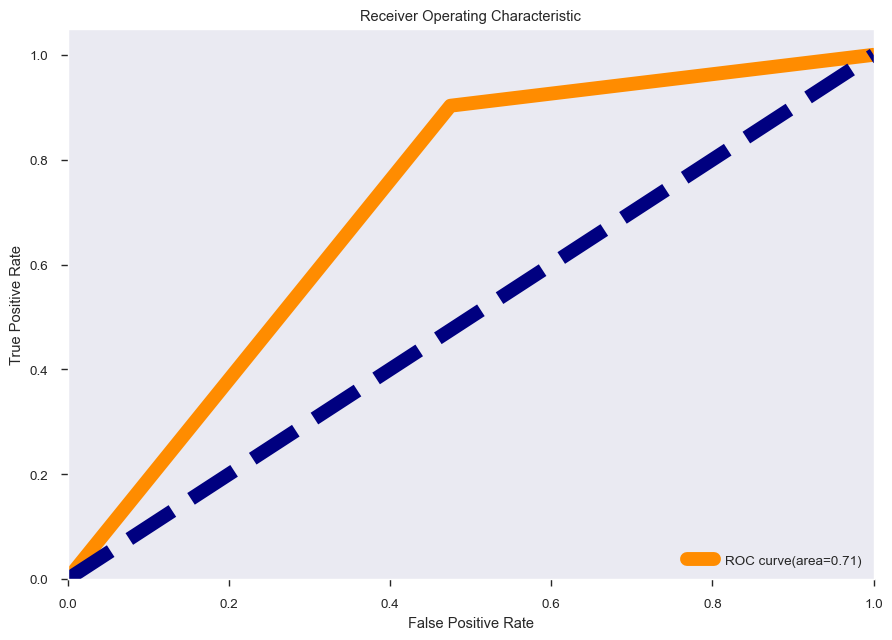

In [166]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 71%

RANDOM FOREST CLASSIFIER

In [167]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train_res,y_train_res.ravel())
# predicting score
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
#calculates score of the model using score method
rf_score = rf.score(new_xtest,y_test)
print('score of model is : ',rf_score*100)

score of model is :  78.24037706205813


In [168]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 99.98655190962883
Accuracy Score of Testing Data is: 78.24037706205813


In [169]:
#choosing best Random state
for i in range(0,100):
    rf.fit(x_train_res, y_train_res.ravel())
    pred_train_rf=rf.predict(x_train_res)
    pred_test_rf=rf.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)
        

In [170]:
print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

accuracy score is: 78.24037706205813


In [171]:
#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,10):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    print("\n")
        

At cv:- 2
cross validation score is: 78.24037706205813
accuracy score is: 78.24037706205813


At cv:- 3
cross validation score is: 78.24037706205813
accuracy score is: 78.24037706205813


At cv:- 4
cross validation score is: 78.24037706205813
accuracy score is: 78.24037706205813


At cv:- 5
cross validation score is: 78.24037706205813
accuracy score is: 78.24037706205813


At cv:- 6
cross validation score is: 78.24037706205813
accuracy score is: 78.24037706205813


At cv:- 7
cross validation score is: 78.24037706205813
accuracy score is: 78.24037706205813


At cv:- 8
cross validation score is: 78.24037706205813
accuracy score is: 78.24037706205813


At cv:- 9
cross validation score is: 78.24037706205813
accuracy score is: 78.24037706205813




parameter tuning

In [172]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'random_state': 0}


In [173]:
rf=RandomForestClassifier(criterion="entropy",max_features="auto",n_estimators=50,random_state=2,bootstrap="True",min_weight_fraction_leaf= 0.1)
rf.fit(x_train_res,y_train_res.ravel())
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
rf_score = rf.score(x_train_res,y_train_res)
rf_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 76.04084838963078
score of model is: 77.93168370091446


In [174]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 78.90273063678627


In [175]:
print(confusion_matrix(y_test,pred_test_rf))

[[264  65]
 [274 670]]


In [176]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.49      0.80      0.61       329
           1       0.91      0.71      0.80       944

    accuracy                           0.73      1273
   macro avg       0.70      0.76      0.70      1273
weighted avg       0.80      0.73      0.75      1273



AUC-ROC CURVE:

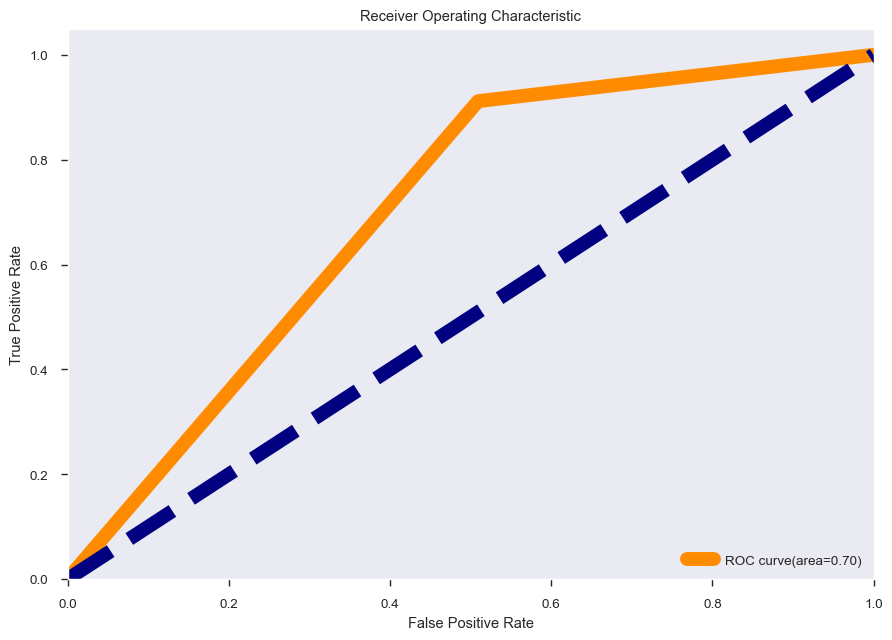

In [177]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_rf,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

DECISION TREE CLASSIFIER

In [178]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train_res, y_train_res.ravel())
pred_test_dtc = dtc.predict(new_xtest)
pred_train_dtc = dtc.predict(x_train_res)
dtc_score = dtc.score(new_xtest,y_test)
print('score of model is : ',dtc_score*100)



score of model is :  72.74155538098978


In [179]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 72.74155538098978


parameter tuning

In [180]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'max_depth':[11],'min_samples_split': [2,3,4],'min_samples_leaf':[1,2,3] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}


In [181]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',max_depth= 11 , random_state= 3, splitter= 'random',min_samples_leaf= 3,min_samples_split= 2)
dt.fit(x_train_res,y_train_res.ravel())
pred_test_dt=dt.predict(new_xtest)
pred_train_dt=dt.predict(x_train_res)
dt_score = dt.score(x_train_res,y_train_res.ravel())
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 73.2128829536528
score of model is: 82.94782140935986


In [182]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 77.3305765116819


In [183]:
print(confusion_matrix(y_test,pred_test_dtc))

[[183 146]
 [201 743]]


In [184]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       0.48      0.56      0.51       329
           1       0.84      0.79      0.81       944

    accuracy                           0.73      1273
   macro avg       0.66      0.67      0.66      1273
weighted avg       0.74      0.73      0.73      1273



AUC-ROC CURVE:

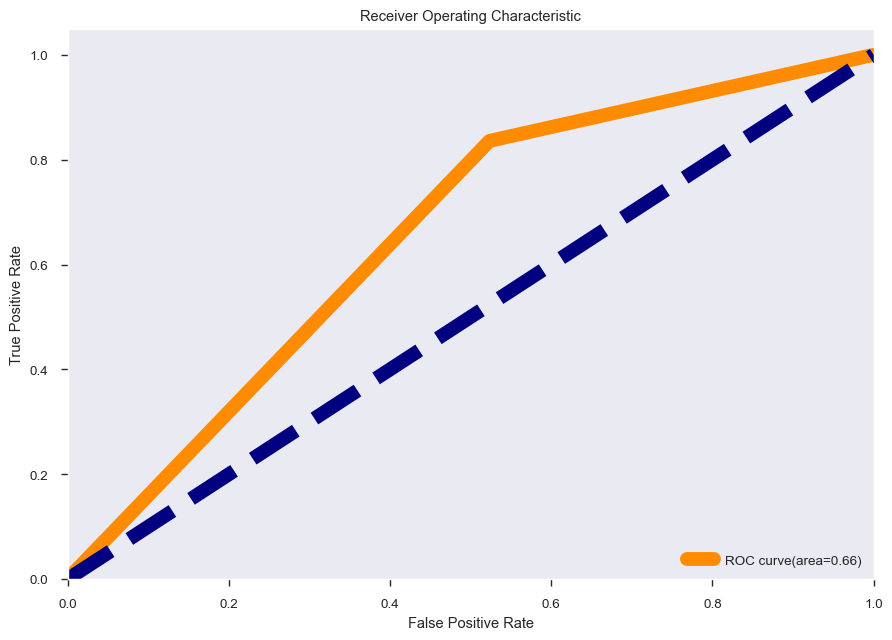

In [185]:
# ROC_AUC CURVE
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_dtc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 66%

KNEIGHBORS CLASSIFIER

In [186]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res.ravel())
pred_test_knn = knn.predict(new_xtest)
pred_train_knn = knn.predict(x_train_res)
knn_score = knn.score(new_xtest,y_test)
print('score of model is : ',knn_score*100)



score of model is :  69.12804399057345


In [187]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_knn)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_knn)*100)


Accuracy Score of Training Data is: 86.01398601398601
Accuracy Score of Testing Data is: 69.12804399057345


parameter tuning

In [188]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5,6],'weights':['uniform', 'distance'],'leaf_size':[35,30],'n_jobs':[-1,1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}


In [189]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 35, n_jobs= -1, n_neighbors= 6, weights= 'uniform')
knn.fit(x_train_res,y_train_res.ravel())
pred_test_knn=knn.predict(new_xtest)
pred_train_knn=knn.predict(x_train_res)
knn_score = knn.score(x_train_res,y_train_res.ravel())
knn_acc_score=accuracy_score(y_test,pred_test_knn)
print("Accuracy score is:",knn_acc_score*100)
print("score of model is:",knn_score*100)

Accuracy score is: 66.45718774548311
score of model is: 82.94782140935986


In [190]:
cv_score_knn=cross_val_score(knn,x,y,cv=5)
cv_mean_knn=cv_score_knn.mean()
print("cv_mean is:",cv_mean_knn*100)

cv_mean is: 75.7741333056663


In [191]:
print(confusion_matrix(y_test,pred_test_knn))

[[258  71]
 [356 588]]


In [192]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.42      0.78      0.55       329
           1       0.89      0.62      0.73       944

    accuracy                           0.66      1273
   macro avg       0.66      0.70      0.64      1273
weighted avg       0.77      0.66      0.69      1273



AUC-ROC CURVE:

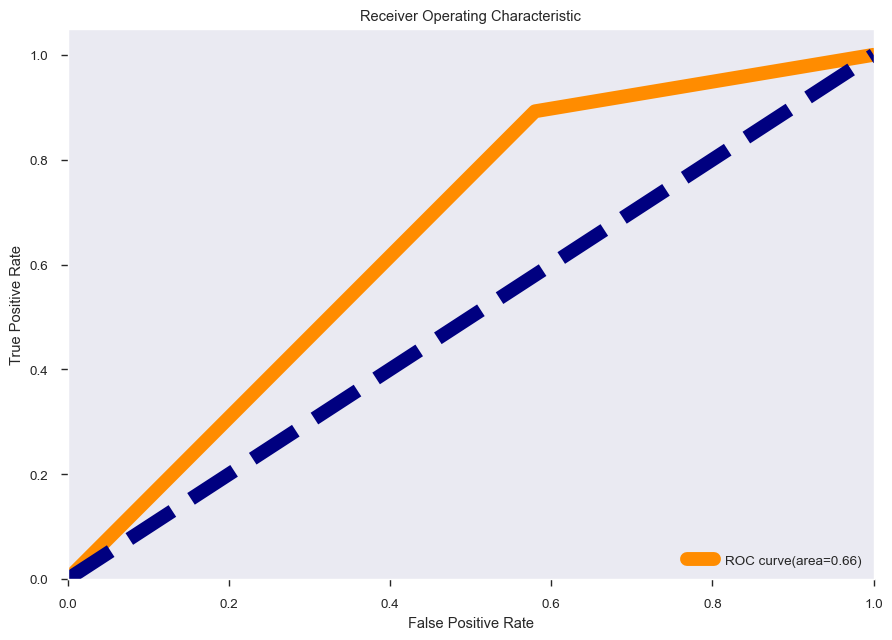

In [193]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_knn,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 66%

GAUSSIANNB

In [194]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train_res, y_train_res.ravel())
pred_test_gnb = gnb.predict(new_xtest)
pred_train_gnb = gnb.predict(x_train_res)
gnb_score = gnb.score(new_xtest,y_test)
print('score of model is : ',gnb_score*100)

score of model is :  75.72663000785546


In [195]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)


Accuracy Score of Training Data is: 76.96342119419043
Accuracy Score of Testing Data is: 75.72663000785546


parameter tuning

In [196]:
#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.0012328467394420659}


In [197]:
gnb=GaussianNB(var_smoothing=0.15199110829529336)
gnb.fit(x_train_res,y_train_res.ravel())
pred_test_gnb=gnb.predict(new_xtest)
pred_train_gnb=gnb.predict(x_train_res)
gnb_score = gnb.score(x_train_res,y_train_res.ravel())
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 72.89866457187746
score of model is: 75.98171059709522


In [198]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)




cv_mean is: 75.91564273962858


In [199]:
print(confusion_matrix(y_test,pred_test_gnb))

[[272  57]
 [288 656]]


In [200]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.49      0.83      0.61       329
           1       0.92      0.69      0.79       944

    accuracy                           0.73      1273
   macro avg       0.70      0.76      0.70      1273
weighted avg       0.81      0.73      0.75      1273



AUC-ROC CURVE:

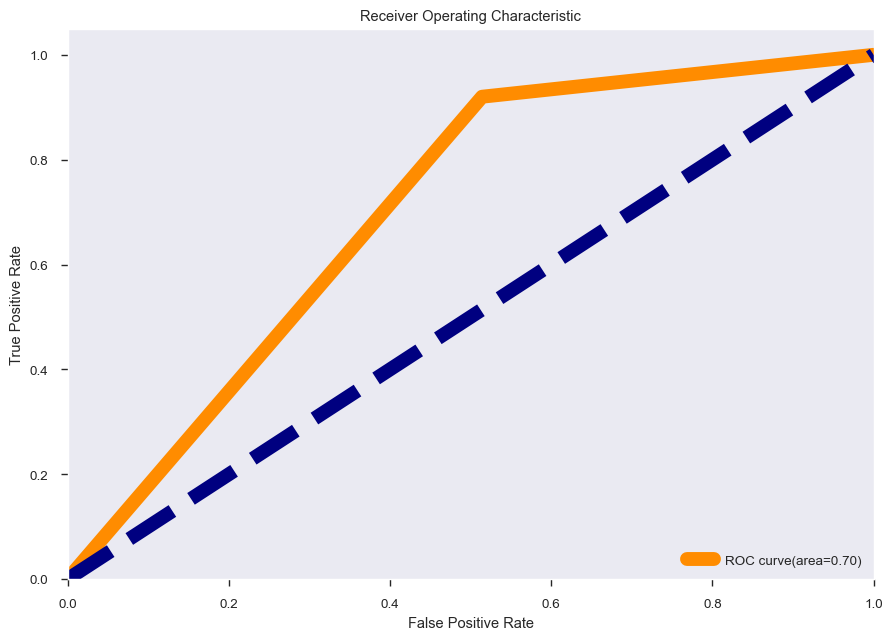

In [201]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gnb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

SUPPROT VECTOR CLASSIFIER

In [202]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train_res, y_train_res.ravel())
pred_test_svc = svc.predict(new_xtest)
pred_train_svc = svc.predict(x_train_res)
svc_score = svc.score(new_xtest,y_test)
print('score of model is : ',svc_score*100)

score of model is :  76.5121759622938


In [203]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_svc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_svc)*100)


Accuracy Score of Training Data is: 83.74125874125873
Accuracy Score of Testing Data is: 76.5121759622938


parameter tuning

In [204]:
#perform gridsearchcv and cross val score on Support Vector classifier

parameters ={'kernel':['linear','rbf'],'tol':[0.01,0.001],'shrinking':[True,False],'max_iter':[1,-1],'probability':[True,False]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.01}


In [205]:
svc=SVC(kernel='rbf',gamma='scale',degree= 3,max_iter= -1, probability= True, shrinking= True, tol= 0.01)
svc.fit(x_train_res,y_train_res.ravel())
pred_test_svc=svc.predict(new_xtest)
pred_train_svc=svc.predict(x_train_res)
svc_score = svc.score(x_train_res,y_train_res.ravel())
svc_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",svc_acc_score*100)
print("score of model is:",svc_score*100)

Accuracy score is: 76.04084838963078
score of model is: 83.72781065088756


In [206]:
cv_score_svc=cross_val_score(svc,x,y,cv=5)
cv_mean_svc=cv_score_svc.mean()
print("cv_mean is:",cv_mean_svc*100)

cv_mean is: 79.9245208910759


In [207]:
print(confusion_matrix(y_test,pred_test_svc))

[[232  97]
 [202 742]]


In [208]:
print(classification_report(y_test,pred_test_svc))

              precision    recall  f1-score   support

           0       0.53      0.71      0.61       329
           1       0.88      0.79      0.83       944

    accuracy                           0.77      1273
   macro avg       0.71      0.75      0.72      1273
weighted avg       0.79      0.77      0.77      1273



AUC-ROC CURVE:

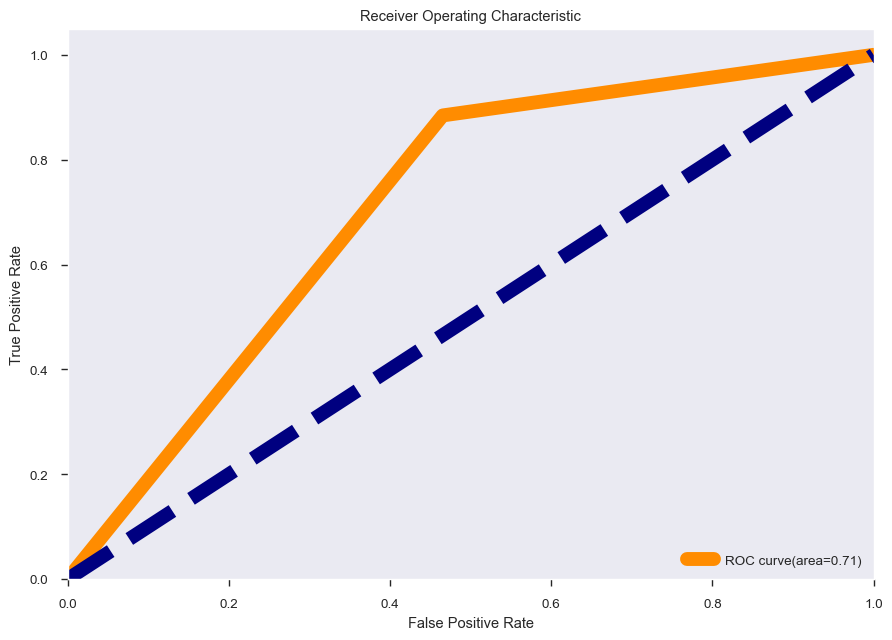

In [209]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_svc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 71%

In [210]:
#Gradient Boosting Classifier

GRADIENT BOOSTING CLASSIFIER

In [211]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train_res, y_train_res)
pred_test_gb = gb.predict(new_xtest)
pred_train_gb = gb.predict(x_train_res)
gb_score = gb.score(new_xtest,y_test)
print('score of model is : ',gb_score*100)




score of model is :  78.79025923016496


In [212]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)

Accuracy Score of Training Data is: 85.52985476062399
Accuracy Score of Testing Data is: 78.79025923016496


parameter tuning

In [213]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['squared_error','mse'],'n_estimators':[150],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2] }
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'criterion': 'squared_error', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 150, 'random_state': 0}


In [214]:
gb=GradientBoostingClassifier(criterion="mse",n_estimators=100,random_state=0,min_weight_fraction_leaf= 0.1)
gb.fit(x_train_res,y_train_res.ravel())
pred_test_gb=gb.predict(new_xtest)
pred_train_gb=gb.predict(x_train_res)
gb_score = gb.score(x_train_res,y_train_res.ravel())
gb_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",gb_acc_score*100)
print("score of model is:",gb_score*100)

Accuracy score is: 76.04084838963078
score of model is: 82.54437869822485


In [215]:
cv_score_gb=cross_val_score(gb,x,y,cv=5)
cv_mean_gb=cv_score_gb.mean()
print("cv_mean is:",cv_mean_gb*100)

cv_mean is: 80.56892795209653


In [216]:
print(confusion_matrix(y_test,pred_test_gb))

[[251  78]
 [206 738]]


In [217]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64       329
           1       0.90      0.78      0.84       944

    accuracy                           0.78      1273
   macro avg       0.73      0.77      0.74      1273
weighted avg       0.81      0.78      0.79      1273



AUC-ROC CURVE:

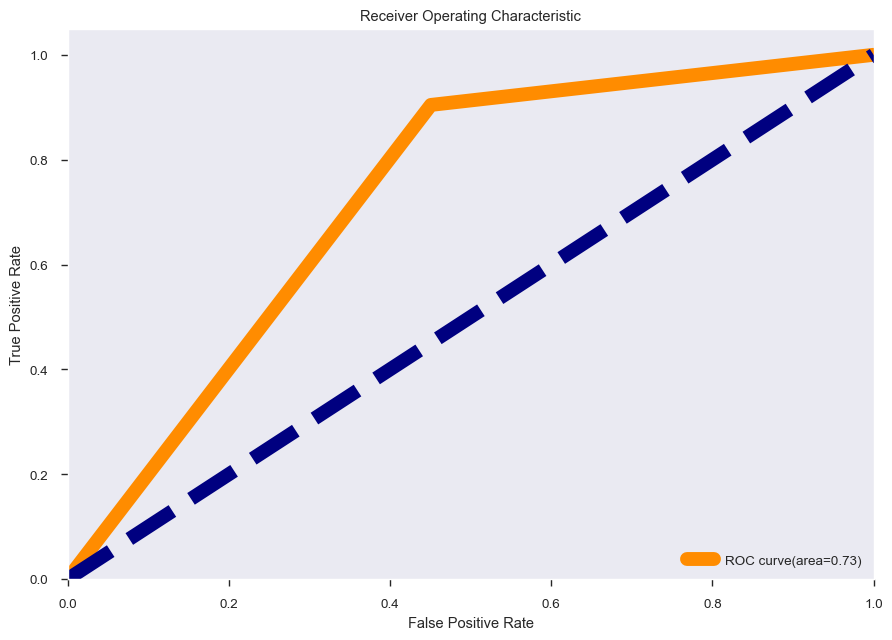

In [218]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 73%

LIGHT GRADIENT BOOSTING CLASSIFIER

In [219]:
!pip install lightgbm

In [220]:
#Light Gradient Boosting Classifier

In [221]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train_res, y_train_res.ravel())
pred_test_lgbm = lgbm.predict(new_xtest)
pred_train_lgbm = lgbm.predict(x_train_res)
lgbm_score = lgbm.score(new_xtest,y_test)
print('score of model is : ',lgbm_score*100)



score of model is :  78.79025923016496


In [222]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)


Accuracy Score of Training Data is: 91.78321678321679
Accuracy Score of Testing Data is: 78.79025923016496


In [223]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[205 124]
 [146 798]]


In [224]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       329
           1       0.87      0.85      0.86       944

    accuracy                           0.79      1273
   macro avg       0.72      0.73      0.73      1273
weighted avg       0.79      0.79      0.79      1273



AUC-ROC CURVE:

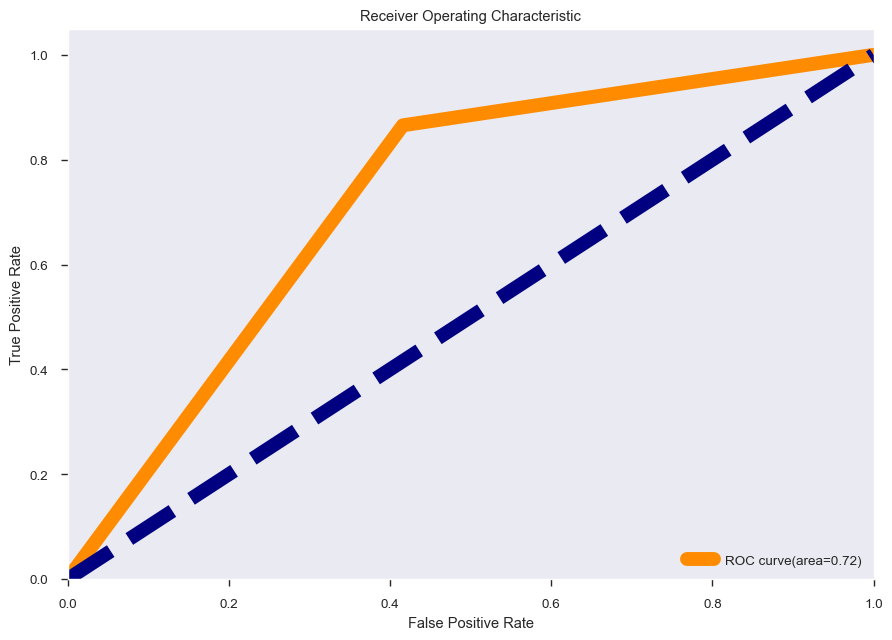

In [225]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_lgbm,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 72%

CAT BOOST CLASSIFIER

In [226]:
!pip install catboost

In [227]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train_res, y_train_res.ravel())
pred_test_cat = cat.predict(new_xtest)
pred_train_cat = cat.predict(x_train_res)
cat_score = cat.score(new_xtest,y_test)
print('score of model is : ',cat_score*100)



Learning rate set to 0.024266
0:	learn: 0.6797818	total: 167ms	remaining: 2m 46s
1:	learn: 0.6677859	total: 170ms	remaining: 1m 24s
2:	learn: 0.6556203	total: 173ms	remaining: 57.4s
3:	learn: 0.6446695	total: 175ms	remaining: 43.7s
4:	learn: 0.6330822	total: 178ms	remaining: 35.5s
5:	learn: 0.6230791	total: 181ms	remaining: 30s
6:	learn: 0.6126030	total: 184ms	remaining: 26s
7:	learn: 0.6028919	total: 186ms	remaining: 23.1s
8:	learn: 0.5933968	total: 189ms	remaining: 20.8s
9:	learn: 0.5851748	total: 191ms	remaining: 18.9s
10:	learn: 0.5782455	total: 194ms	remaining: 17.4s
11:	learn: 0.5703877	total: 197ms	remaining: 16.2s
12:	learn: 0.5635655	total: 199ms	remaining: 15.1s
13:	learn: 0.5577073	total: 202ms	remaining: 14.2s
14:	learn: 0.5515443	total: 205ms	remaining: 13.4s
15:	learn: 0.5458371	total: 208ms	remaining: 12.8s
16:	learn: 0.5403546	total: 210ms	remaining: 12.2s
17:	learn: 0.5350964	total: 213ms	remaining: 11.6s
18:	learn: 0.5310485	total: 216ms	remaining: 11.1s
19:	learn: 0.

In [228]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)


Accuracy Score of Training Data is: 91.15115653577192
Accuracy Score of Testing Data is: 79.3401413982718


In [229]:
print(confusion_matrix(y_test,pred_test_cat))

[[207 122]
 [141 803]]


In [230]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       329
           1       0.87      0.85      0.86       944

    accuracy                           0.79      1273
   macro avg       0.73      0.74      0.74      1273
weighted avg       0.80      0.79      0.80      1273



AUC-ROC CURVE:

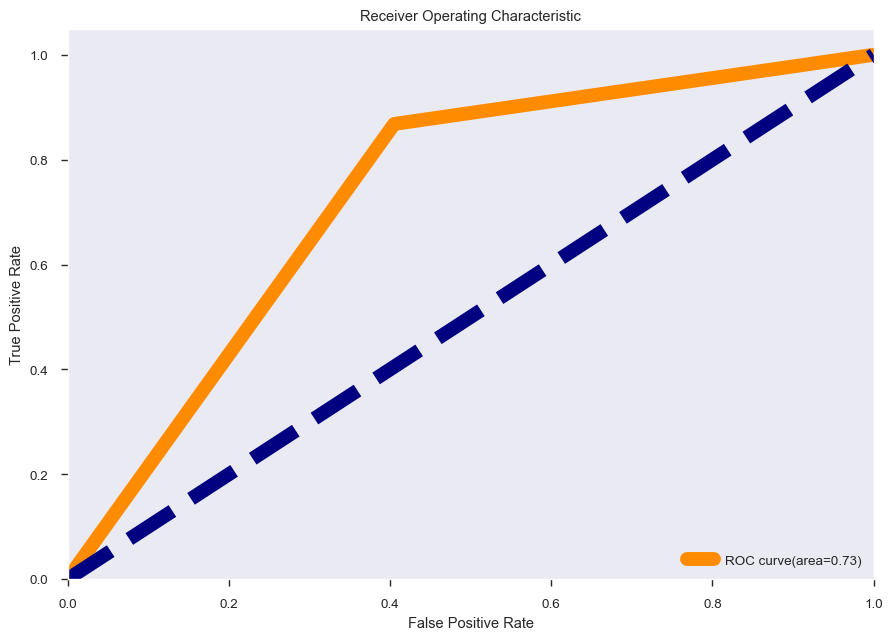

In [231]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_cat,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 73%

EXTRA TREE CLASSIFIER

In [232]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_res, y_train_res.ravel())
pred_test_etc = etc.predict(new_xtest)
pred_train_etc = etc.predict(x_train_res)
etc_score = etc.score(new_xtest,y_test)
print('score of model is : ',etc_score*100)

score of model is :  78.08326787117046


In [233]:
print(confusion_matrix(y_test,pred_test_etc))

[[187 142]
 [137 807]]


In [234]:
print(classification_report(y_test,pred_test_etc))

              precision    recall  f1-score   support

           0       0.58      0.57      0.57       329
           1       0.85      0.85      0.85       944

    accuracy                           0.78      1273
   macro avg       0.71      0.71      0.71      1273
weighted avg       0.78      0.78      0.78      1273



AUC-ROC CURVE:

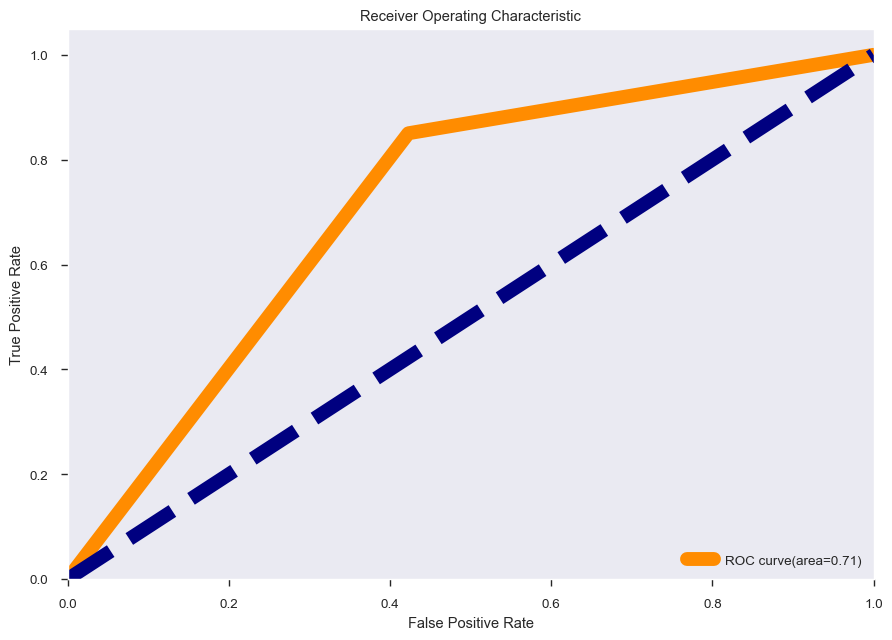

In [235]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_etc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 71%

ADA BOOST CLASSIFIER

In [237]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=0,n_estimators=50,base_estimator=svc,algorithm='SAMME',learning_rate=0.05)
abc.fit(x_train_res, y_train_res.ravel())
pred_test_abc = abc.predict(new_xtest)
pred_train_abc = abc.predict(x_train_res)
abc_score = abc.score(new_xtest,y_test)
print('score of model is : ',abc_score*100)



score of model is :  73.05577376276511


In [238]:
print(confusion_matrix(y_test,pred_test_abc))

[[265  64]
 [279 665]]


In [239]:
print(classification_report(y_test,pred_test_abc))

              precision    recall  f1-score   support

           0       0.49      0.81      0.61       329
           1       0.91      0.70      0.79       944

    accuracy                           0.73      1273
   macro avg       0.70      0.75      0.70      1273
weighted avg       0.80      0.73      0.75      1273



AUC-ROC CURVE:

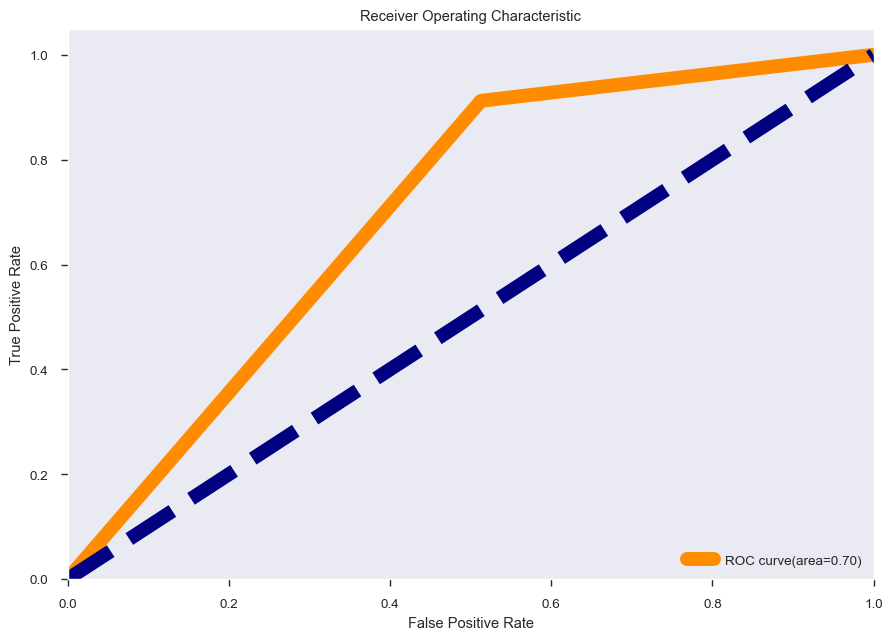

In [240]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_abc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

XGBOOST

In [241]:
!pip install xgboost

In [242]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train_res, y_train_res.ravel())
pred_test_xgb = xgb.predict(new_xtest)
pred_train_xgb = xgb.predict(x_train_res)
xgb_score = xgb.score(new_xtest,y_test)
print('score of model is : ',xgb_score*100)




[19:33:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  78.24037706205813


In [243]:
print(confusion_matrix(y_test,pred_test_xgb))

[[203 126]
 [151 793]]


In [244]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       329
           1       0.86      0.84      0.85       944

    accuracy                           0.78      1273
   macro avg       0.72      0.73      0.72      1273
weighted avg       0.79      0.78      0.78      1273



AUC-ROC CURVE:

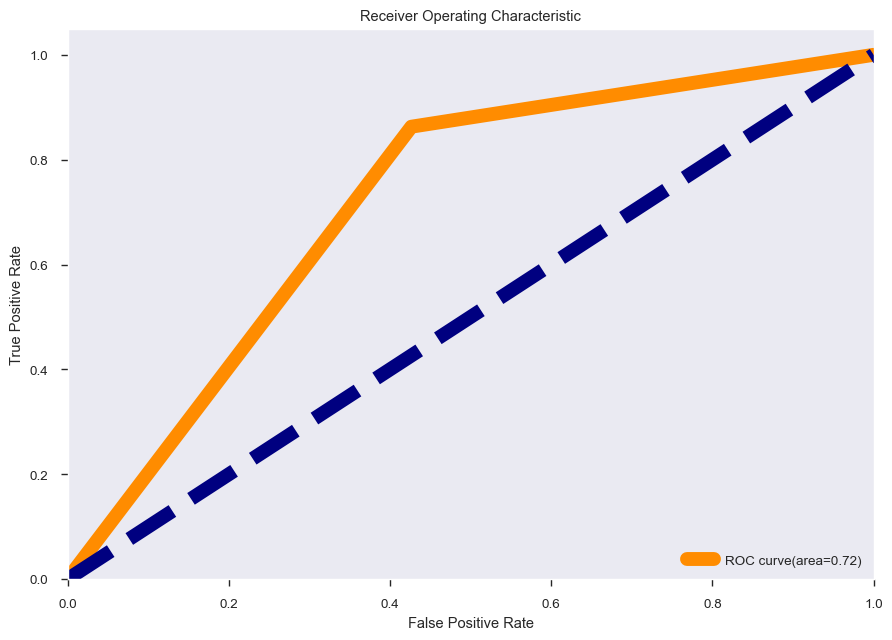

In [245]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_xgb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 72%


VOTING CLASSIFIER

In [247]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('knn',KNeighborsClassifier()))
estimator.append(('svc',SVC(gamma='auto',probability=True)))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator

[('knn', KNeighborsClassifier()),
 ('svc', SVC(gamma='auto', probability=True)),
 ('dtc', DecisionTreeClassifier())]

HARD VOTING CLASSIFIER

In [248]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train_res,y_train_res.ravel())
y_pred_vot_h=vot_hard.predict(new_xtest)
print(y_pred_vot_h)
vot_h_score=accuracy_score(y_test,y_pred_vot_h)
print("Hard Voting Score %d" %vot_h_score)

[1 0 0 ... 1 1 1]
Hard Voting Score 0


SOFT VOTING CLASSIFIER

In [249]:
vot_hard=VotingClassifier(estimators=estimator,voting='soft')
vot_hard.fit(x_train_res,y_train_res.ravel())
y_pred_vot_s=vot_hard.predict(new_xtest)
print(y_pred_vot_s)
vot_s_score=accuracy_score(y_test,y_pred_vot_s)
print("Soft Voting Score %d" %vot_s_score)

[1 0 0 ... 1 1 1]
Soft Voting Score 0


AUC-ROC CURVE:for Hard voting clasifier

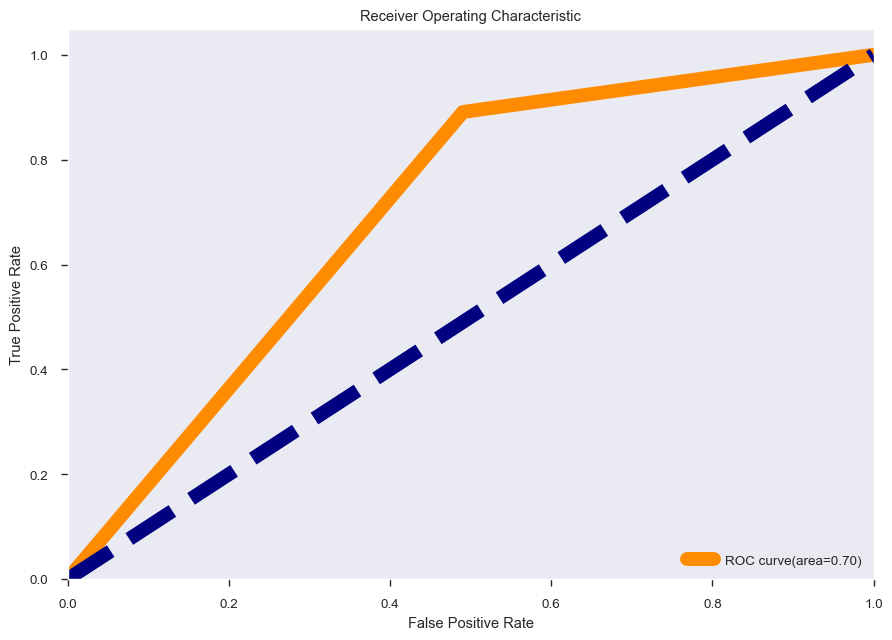

In [250]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_vot_h,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

AUC-ROC CURVE:for soft voting clasifier

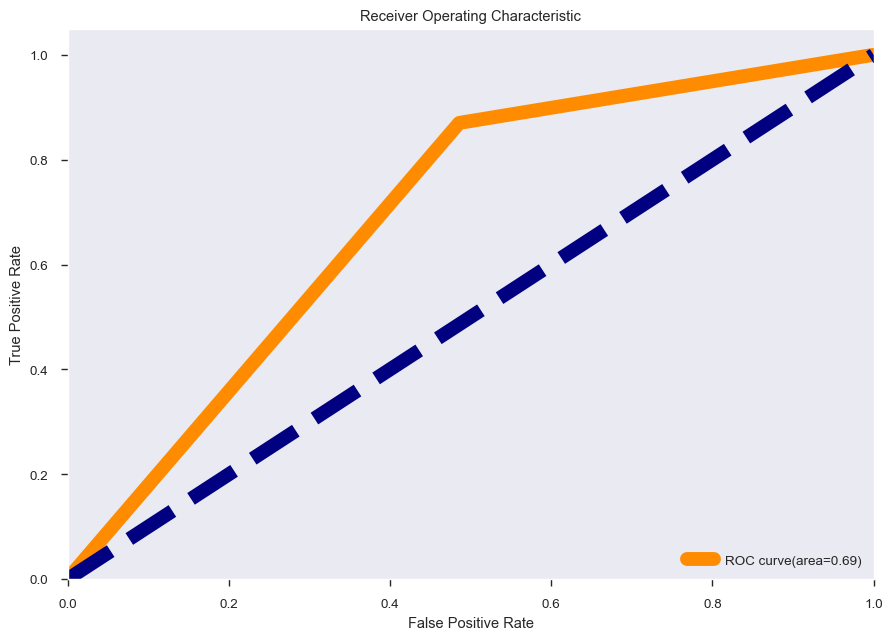

In [251]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_vot_s,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 69%

CONCLUSION


OUTPUT

In [256]:
import numpy as np
a=np.array(y_test)
predicted=np.array(cat.predict(new_xtest))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
1268,1,1
1269,0,0
1270,1,1
1271,0,1


Text(0.5, 1.0, 'Predicted')

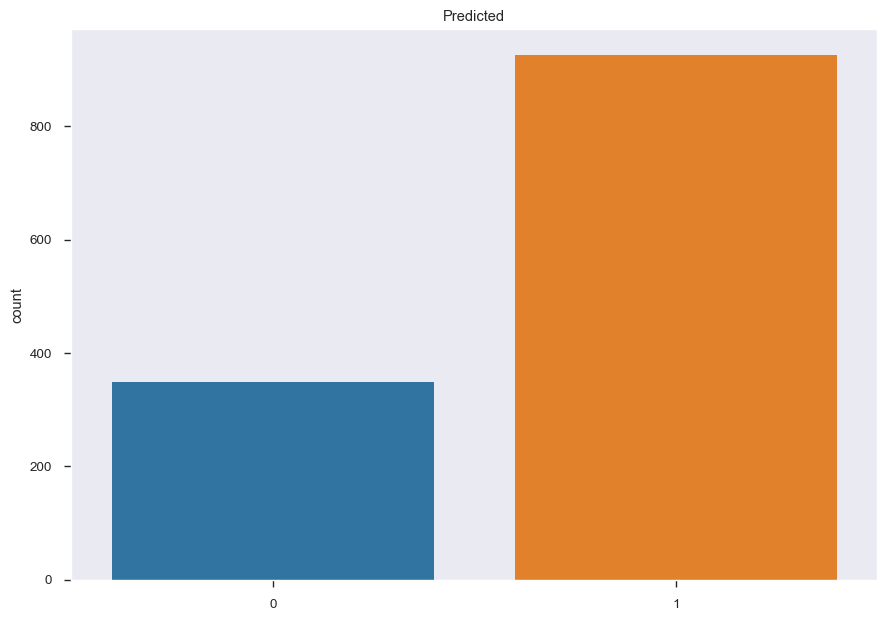

In [257]:
sns.countplot(x=predicted, data=df_con)
plt.title("Predicted")

Text(0.5, 1.0, 'Original')

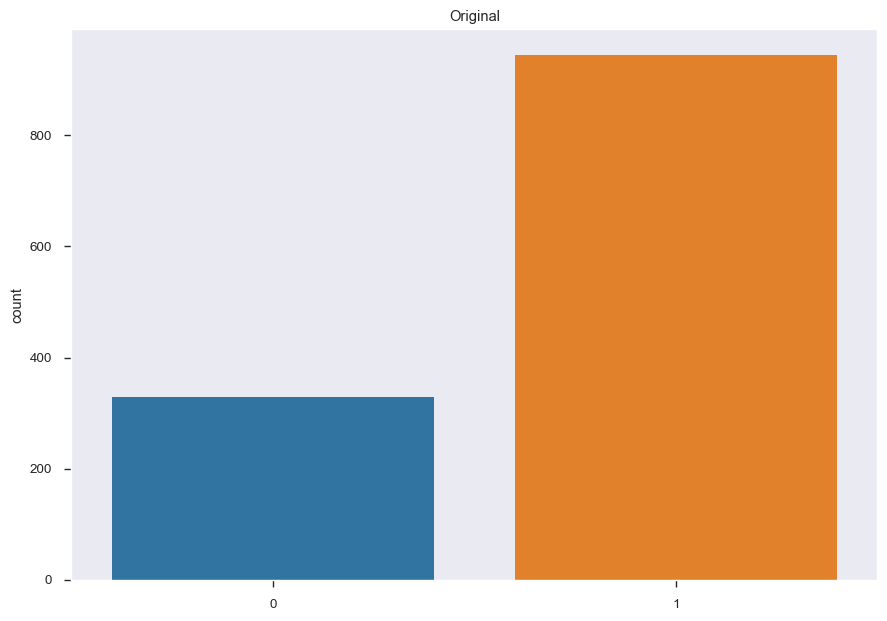

In [258]:
ax = sns.countplot(x=a, data=df)
plt.title("Original")

SAVE MODEL

In [259]:
import pickle
filename='Insurance_Claims_Fraud_Detection_cat.pkl'
pickle.dump(cat,open(filename,'wb'))


In [252]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'ExtraTreesClassifier','AdaBoost','XGBoost','Voting classifier','Soft Voting Classifier']
        

In [253]:
scores=[(accuracy_score(y_test,pred_test)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_knn)*100,accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_svc)*100,
       accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_etc)*100,accuracy_score(y_test,pred_test_abc)*100,accuracy_score(y_test,pred_test_xgb)*100,accuracy_score(y_test,y_pred_vot_h)*100,
       accuracy_score(y_test,y_pred_vot_s)*100]
scores

[76.04084838963078,
 73.36999214454045,
 72.74155538098978,
 66.45718774548311,
 72.89866457187746,
 76.5121759622938,
 77.6904948939513,
 78.79025923016496,
 79.3401413982718,
 78.08326787117046,
 73.05577376276511,
 78.24037706205813,
 74.8625294579733,
 75.0981932443048]

In [254]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [255]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

Nos,Model Names,Scores
9,CatBoostClassifier,79.340141
8,Light Gradient Boosting Classifier,78.790259
12,XGBoost,78.240377
10,ExtraTreesClassifier,78.083268
7,Gradient Boosting Classifier,77.690495
6,SVC,76.512176
1,LogisticRegression,76.040848
14,Soft Voting Classifier,75.098193
13,Voting classifier,74.862529
2,RandomForestClassifier,73.369992


From the above models CatBoostClassifier performs well.
Because,CatBoost is the only boosting algorithm with very less prediction time. Thanks to its symmetric tree structure. It is comparatively 8x faster than XGBoost while predicting.
So we save this model for prediction

The churn customers are high because of contract,high charges they pay, bills,tenure and other factors.And also the factor the senior citizen will move out because of age.So we have to keep all factors in mind and draw plan accordingly

In [265]:
df_con.to_csv("Customer Churn Analysis_cat.csv",sep='\t')